# A/B Testing Analysis: Extracting Insights and Drawing Conclusions

### Author: David Heller

---

## Introduction

The A/B Testing Project aims to explore and analyze the effectiveness of a new design variant compared to an existing one through rigorous statistical analysis and experimentation. By leveraging user interaction data, the project seeks to uncover actionable insights into various metrics such as completion rates, time spent on different steps, error rates, and step abandonment rates. Through a structured approach encompassing data preparation, exploration, analysis, and statistical testing, the project aims to determine whether the proposed design changes lead to meaningful improvements in user engagement and overall user experience. With the aid of Python libraries such as pandas, numpy, matplotlib, seaborn, scipy, and statsmodels, the project navigates through the stages of data preprocessing, visualization, hypothesis testing, and experiment evaluation, ultimately drawing conclusions about the efficacy of the new design variant and providing valuable insights for decision-making.

---

## Table of Contents
- [Project Brief](#project-brief-anchor)
    - [Context](#context-anchor)
    - [The Experiment Conducted](#experiment-conducted-anchor)
    - [Datasets](#datasets-anchor)
    - [Metadata](#metadata-anchor)
- [Data Preprocessing and Cleaning](#data-preprocessing-and-cleaning-anchor)
- [Explanatory Data Analysis](#explanatory-data-analysis-anchor)
    - [Clients Dataset](#clients-dataset-anchor)
    - [Digital Footprints Dataset (df_web_data)](#digital-footprints-dataset-anchor)
- [A/B Testing Analysis](#ab-testing-analysis-anchor)
    - [KPIs](#kpis-anchor)
        - [Completion Rates](#completion-rates-anchor)
        - [Time Spent on Each Step](#time-spent-on-each-step-anchor)
        - [Error Rates](#error-rates-anchor)
        - [Step Abandonment Rate](#step-abandonment-rate-anchor)
- [Statistical Tests](#statistical-tests-anchor)
     - [Hypothesis Testing](#hypothesis-testing-anchor)
       - [Hypothesis I: Test and Control Group Completion Rate Equality Assessment](#hypothesis-i-anchor)
       - [Hypothesis II: Evaluating Completion Rate Differential Between Test and Control Groups](#hypothesis-ii-anchor)
       - [Hypothesis III: Assessing Systematic Differences in Group Distribution](#hypothesis-iii-anchor)
- [A/B Testing Conclusions](#ab-testing-conclusions-anchor)
- [Experiment Evaluation](#short-experiment-evaluation-anchor)

---

## <a id="project-brief-anchor"></a>Project Brief

### <a id="context-anchor"></a>Context

An anonymous investment management company conducted an A/B experiment to enhance their user experience by implementing a more intuitive and modern User Interface (UI) along with timely in-context prompts—cues, messages, hints, or instructions provided directly within the context of users' tasks. The goal of the experiment was to determine if these changes would encourage more clients to complete the process. Now, it's time to analyze the results and uncover the impact of these enhancements.

### <a id="experiment-conducted-anchor"></a>The Experiment Conducted

An A/B test was set into motion from 3/15/2017 to 6/20/2017 by the company.

* Control Group: Clients interacted with the company's traditional online process.
* Test Group: Clients experienced the new, spruced-up digital interface.

Both groups navigated through an identical process sequence: an initial page, three subsequent steps, and finally, a confirmation page signaling process completion.

The goal is to see if the new design leads to a better user experience and higher process completion rates.

### <a id="datasets-anchor"></a>Datasets
Provided by the anonymous company:

* ##### Client Profiles (df_final_demo): Demographics like age, gender, and account details of the clients.
Size and dimensionality: 70,609 rows × 9 columns

* ##### Digital Footprints (df_final_web_data): A detailed trace of client interactions online, divided into two parts: pt_1 and pt_2.
Size and dimensionality of the combined df: 755,405 rows × 5 columns

* ##### Experiment Roster (df_final_experiment_clients): A list revealing which clients were part of the grand experiment.
Size and dimensionality: 70,609 rows × 2 columns

### <a id="metadata-anchor"></a>Metadata

* client_id: Every client’s unique ID.
* variation: Indicates if a client was part of the experiment.
* visitor_id: A unique ID for each client-device combination.
* visit_id: A unique ID for each web visit/session.
* process_step: Marks each step in the digital process.
* date_time: Timestamp of each web activity.
* clnt_tenure_yr: Represents how long the client has been with the company, measured in years.
* clnt_tenure_mnth: Further breaks down the client’s tenure with the company in months.
* clnt_age: Indicates the age of the client.
* gendr: Specifies the client’s gender.
* num_accts: Denotes the number of accounts the client holds with the organization.
* bal: Gives the total balance spread across all accounts for a particular client.
* calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
* logons_6_mnth: Reflects the frequency with which the client logged onto the company’s platform over the last six months

---

## <a id="data-preprocessing-and-cleaning-anchor"></a>Data Preprocessing and Cleaning

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ignoring warnings for better readability 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Web Data

In [4]:
df1_web_data = pd.read_csv('df_final_web_data_pt_1.txt')

In [5]:
df1_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [6]:
df2_web_data = pd.read_csv('df_final_web_data_pt_2.txt')

In [7]:
df2_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [8]:
# Concatenating the web_data dataframes
df_web_data = pd.concat([df1_web_data, df2_web_data])

In [9]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [10]:
df_web_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


In [11]:
df_web_data['process_step'].nunique()

5

In [12]:
df_web_data['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [13]:
# Client Profiles

In [14]:
df_clients = pd.read_csv('df_final_demo.txt')

In [15]:
df_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [16]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [17]:
# Renaming the columns to make them more descriptive

df_clients = df_clients.rename(columns={
    'clnt_tenure_yr': 'tenure_years',
    'clnt_tenure_mnth': 'tenure_months',
    'clnt_age': 'age',
    'gendr': 'gender',
    'num_accts': 'number_of_accounts',
    'bal': 'balance',
    'calls_6_mnth': 'calls_last_6_months',
    'logons_6_mnth': 'logons_last_6_months'
})

In [18]:
df_clients.columns

Index(['client_id', 'tenure_years', 'tenure_months', 'age', 'gender',
       'number_of_accounts', 'balance', 'calls_last_6_months',
       'logons_last_6_months'],
      dtype='object')

In [19]:
# checking for null values
df_clients.isnull().sum()

client_id                0
tenure_years            14
tenure_months           14
age                     15
gender                  14
number_of_accounts      14
balance                 14
calls_last_6_months     14
logons_last_6_months    14
dtype: int64

In [20]:
df_clients[df_clients.isnull().any(axis=1)].shape

(15, 9)

In [21]:
df_clients[df_clients.isnull().any(axis=1)]

,client_id,tenure_years,tenure_months,age,gender,number_of_accounts,balance,calls_last_6_months,logons_last_6_months
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# I will drop these clients (except for client_id 4666211) as they do not provide any info

df_clients.dropna(thresh=2, inplace = True)

In [23]:
df_clients.isnull().sum()

client_id               0
tenure_years            0
tenure_months           0
age                     1
gender                  0
number_of_accounts      0
balance                 0
calls_last_6_months     0
logons_last_6_months    0
dtype: int64

In [24]:
df_clients['age'].describe()

count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: age, dtype: float64

In [25]:
# I will fill the null_value in age with the mean age

mean_age = df_clients['age'].mean()

# Fill null values in 'Client Age' with the mean age
df_clients['age'].fillna(mean_age, inplace=True)

In [26]:
df_clients['gender'].value_counts()

U    24122
M    23724
F    22746
X        3
Name: gender, dtype: int64

In [27]:
# Since there are 3 'X' values and I am not sure what it means, I am going to consider them as 'U' for unspecified
df_clients['gender'] = df_clients['gender'].replace('X', 'U')

In [28]:
df_clients['gender'].value_counts()

U    24125
M    23724
F    22746
Name: gender, dtype: int64

In [29]:
# Client Profiles

df_clients_experiment = pd.read_csv('df_final_experiment_clients.txt')



In [30]:
df_clients_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [31]:
df_clients_experiment.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [32]:
df_clients_experiment['Variation'].value_counts()

Test       26968
Control    23532
Name: Variation, dtype: int64

In [33]:
# Since I am interested in analyzing the results of the experiment, I am going to drop the null values
# and join this dataframe with the clients dataframe (considering the ones participate in the experiment)

In [34]:
# Dropping null values
df_clients_experiment_filtered = df_clients_experiment.dropna()

In [35]:
df_clients_experiment_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  50500 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [36]:
df_clients_experiment_filtered.isnull().sum()

client_id    0
Variation    0
dtype: int64

In [37]:
# Merging clients' info with the experiment variation dataset

df_clients_tested = pd.merge(df_clients_experiment_filtered, df_clients, on='client_id')

df_clients_tested

,client_id,Variation,tenure_years,tenure_months,age,gender,number_of_accounts,balance,calls_last_6_months,logons_last_6_months
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50483,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50484,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50485,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50486,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [38]:
df_clients_tested = df_clients_tested.rename(columns={
    'Variation': 'variation'})

In [39]:
# It makes sense to converting some numerical columns to integers
numerical_columns = ['tenure_years', 'tenure_months', 'age', 'number_of_accounts', 'calls_last_6_months', 'logons_last_6_months']
for column in numerical_columns:
    df_clients_tested[column] = df_clients_tested[column].astype(int)

---

## <a id="explanatory-data-analysis-anchor"></a>Explanatory Data Analysis

#### <a id="clients-dataset-anchor"></a>Clients Dataset

In [40]:
numerical_columns = ['tenure_years', 'tenure_months', 'age', 'number_of_accounts', 'balance', 'calls_last_6_months', 'logons_last_6_months']
df_clients_tested[numerical_columns].describe()

,tenure_years,tenure_months,age,number_of_accounts,balance,calls_last_6_months,logons_last_6_months
count,50488.000000,50488.000000,50488.000000,50488.000000,5.048800e+04,50488.000000,50488.000000
mean,12.031730,150.415485,47.058430,2.254575,1.495147e+05,3.093289,6.131873
std,6.860282,81.944830,15.527939,0.533671,3.020364e+05,2.187991,2.175423
min,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,6.000000,82.000000,33.000000,2.000000,3.987841e+04,1.000000,4.000000
50%,11.000000,136.000000,48.000000,2.000000,6.573360e+04,3.000000,6.000000
75%,16.000000,192.000000,59.000000,2.000000,1.399565e+05,5.000000,8.000000
max,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


#### Tenure (Years and Months):

* On average, clients have been with the company for around 12 years and 150 months.
* The tenure duration varies widely, with a standard deviation of approximately 6.86 years and 81.94 months.
* The majority of clients have tenures ranging between 6 to 16 years or 82 to 192 months.

#### Age:

* The average age of clients is approximately 47 years.
* There is a moderate spread in ages, with a standard deviation of around 15.53 years.
* The age distribution is fairly symmetrical, with a median age of 48 years and a similar number of clients below and above this age.

#### Number of Accounts:

* On average, clients have about 2 accounts.
* Most clients have either 1 or 2 accounts, as indicated by the median and quartile values.
* Some clients have more accounts, with a maximum of 7 accounts.

#### Balance:

* The average balance across all clients is approximately USD 149,514.70.
* There is a wide range in balances, with a large standard deviation of USD 302,036.40.
* The distribution of balances is right-skewed, with a few clients having very high balances, as indicated by the maximum value of USD 16,320,041.00.

#### Calls and Logons in the Last 6 Months:

* On average, clients made around 3 calls and logged in approximately 6 times in the last 6 months.
* The variability in call and logon frequencies is relatively low compared to other variables, with standard deviations of around 2.19 calls and 2.18 logons.
* The majority of clients made 1 to 5 calls and logged in 4 to 8 times in the last 6 months.

In [41]:
# Detect outliers using the IQR method
Q1 = df_clients_tested[numerical_columns].quantile(0.25)
Q3 = df_clients_tested[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = df_clients_tested[~((df_clients_tested[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_clients_tested[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Number of rows before removing outliers: {df_clients_tested.shape[0]}')
print(f'Number of rows after removing outliers: {df_no_outliers.shape[0]}')

Number of rows before removing outliers: 50488
Number of rows after removing outliers: 36240


In [42]:
# I will not remove outliers for now as I am not sure how that would affect the analysis (considering that we would be
# losing a lot of data). 

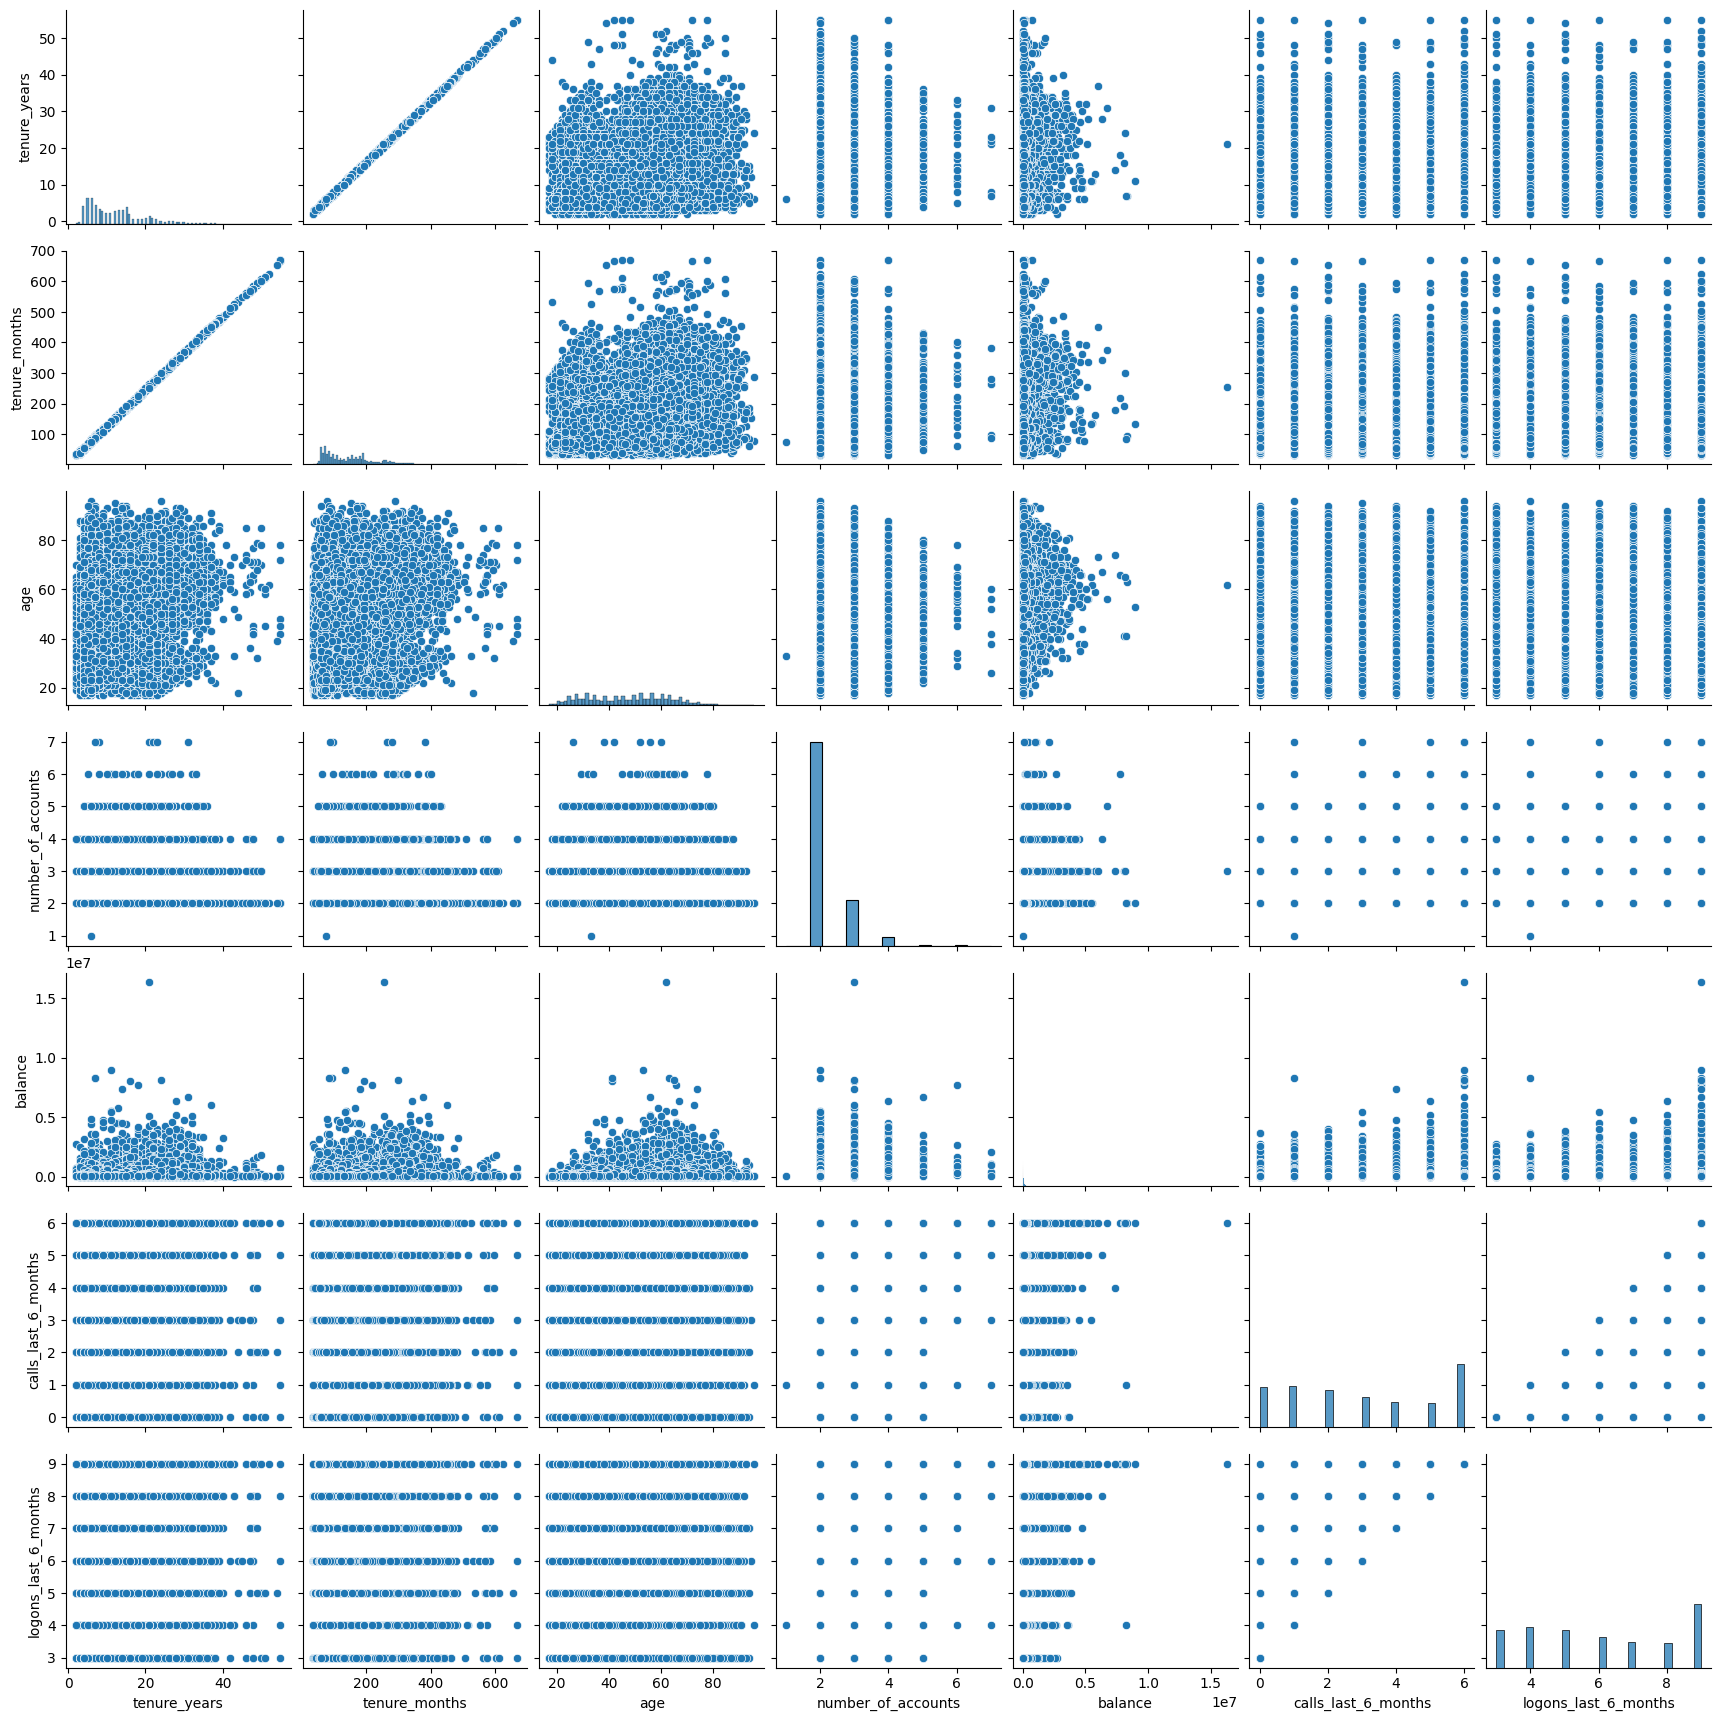

In [43]:
# Create a pairplot
sns.pairplot(df_clients_tested[numerical_columns])
plt.show()

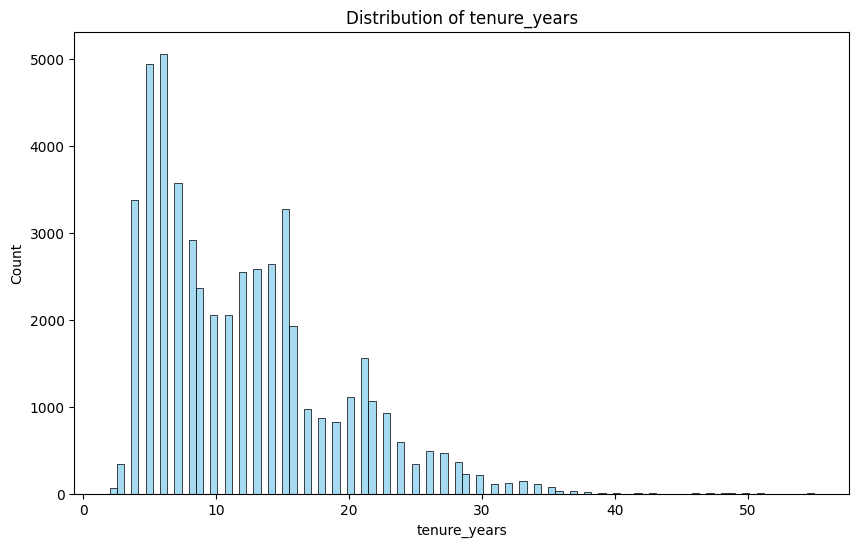

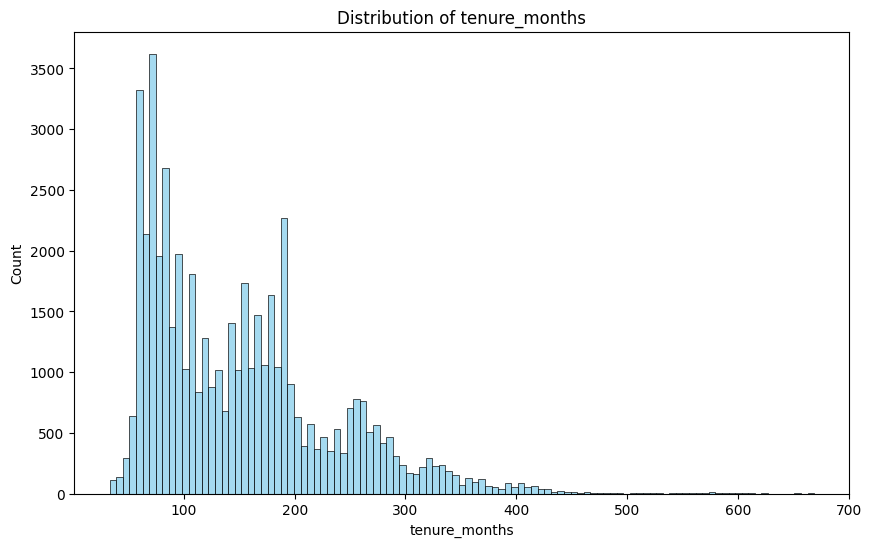

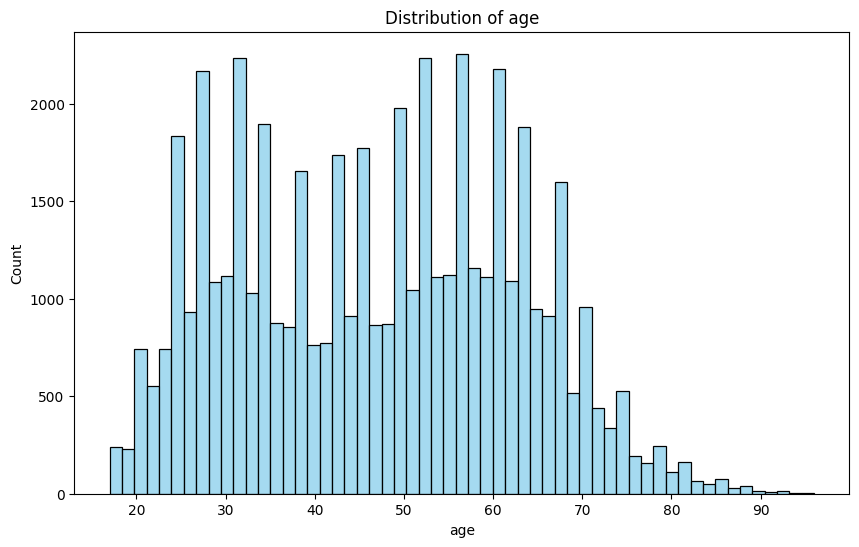

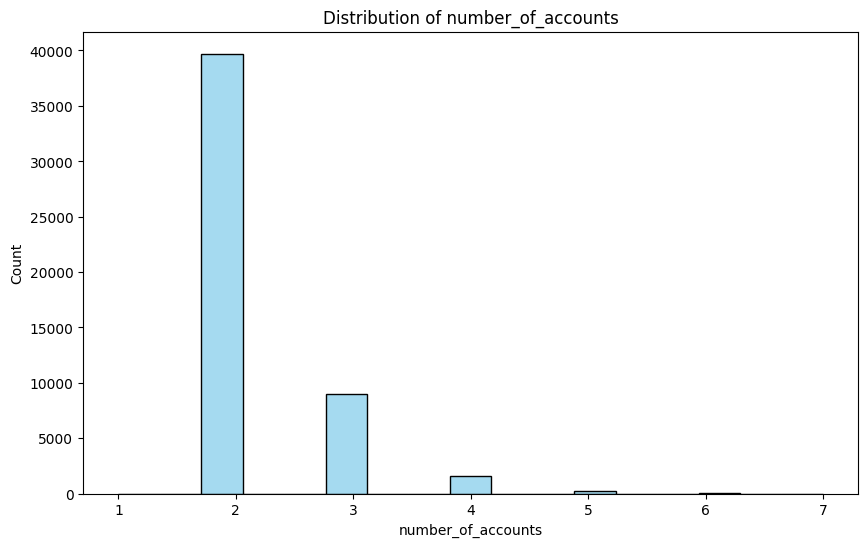

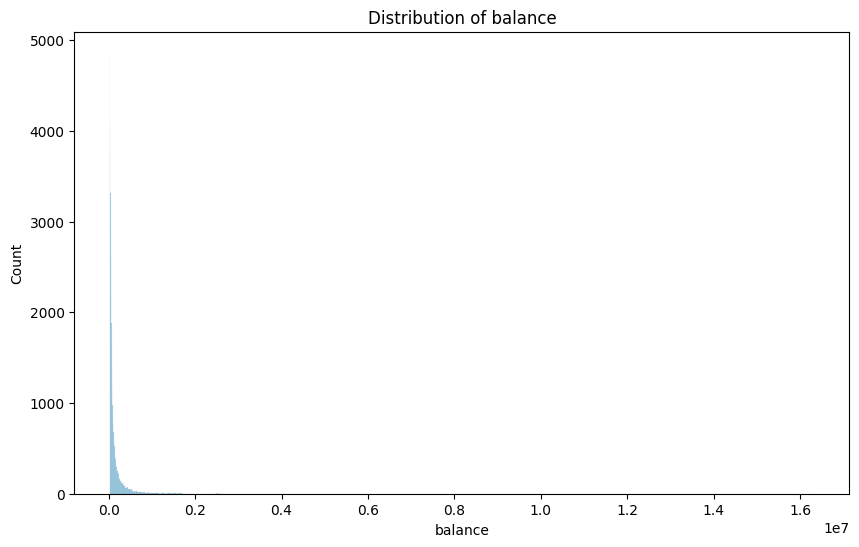

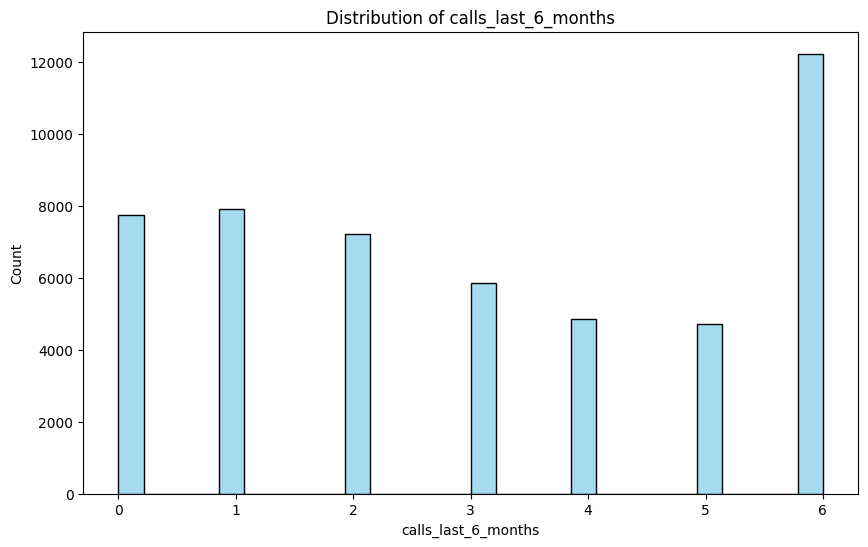

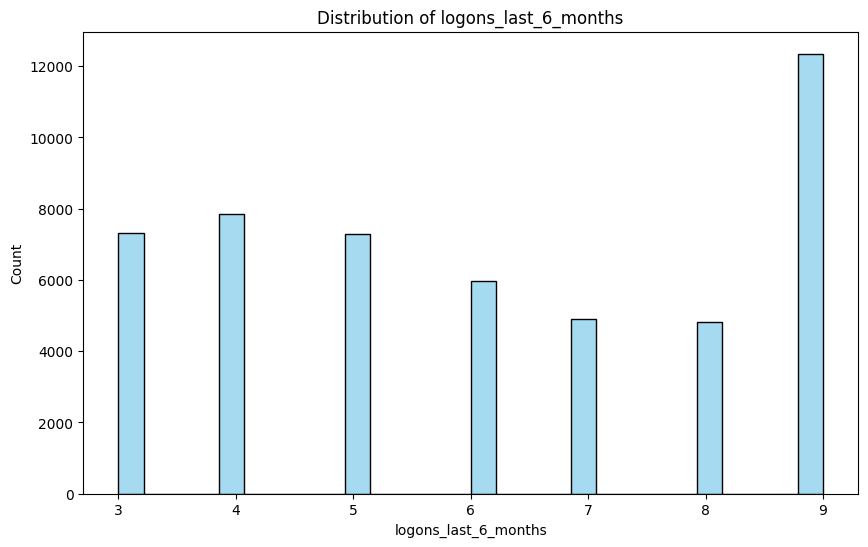

In [44]:
# Distribution plots for numerical variables
numerical_columns = ['tenure_years', 'tenure_months', 'age', 'number_of_accounts', 'balance', 'calls_last_6_months', 'logons_last_6_months']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_clients_tested[column], color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.show()

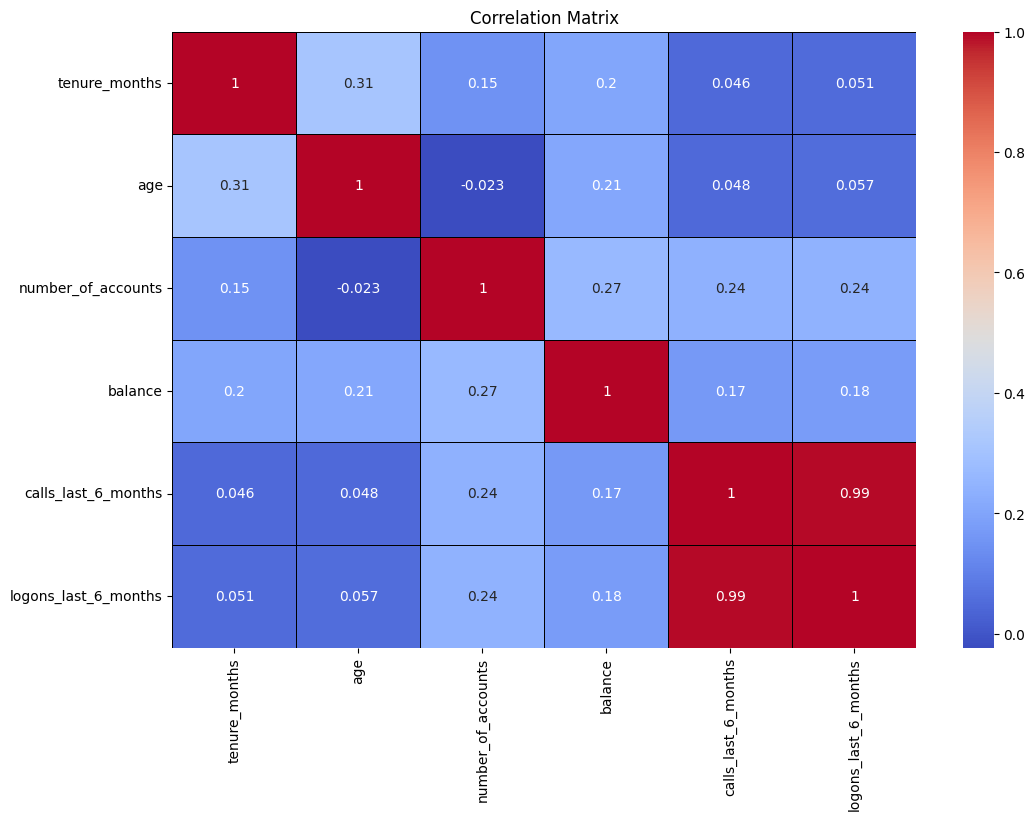

In [45]:
# Correlation matrix among columns
numerical_columns.remove('tenure_years') # Removing tenure_years because it tells me the same thing as tenure_months
correlation_matrix = df_clients_tested[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [46]:
# Printing the correlation matrix
correlation_matrix

,tenure_months,age,number_of_accounts,balance,calls_last_6_months,logons_last_6_months
tenure_months,1.000000,0.311356,0.148261,0.203934,0.046081,0.050823
age,0.311356,1.000000,-0.022764,0.207058,0.047788,0.056666
number_of_accounts,0.148261,-0.022764,1.000000,0.265916,0.237022,0.241447
balance,0.203934,0.207058,0.265916,1.000000,0.168387,0.175318
calls_last_6_months,0.046081,0.047788,0.237022,0.168387,1.000000,0.994447
logons_last_6_months,0.050823,0.056666,0.241447,0.175318,0.994447,1.000000


#### Tenure Months and Other Variables:

* Tenure months has a positive correlation with age (0.311), number of accounts (0.148), balance (0.204), calls last 6 months (0.046), and logons last 6 months (0.051).
* The correlations with age, number of accounts, and balance are moderate, indicating that as tenure months increase, these variables tend to increase as well, but not very strongly.
* The correlations with calls last 6 months and logons last 6 months are weak, suggesting a slight positive relationship.

#### Age and Other Variables:

* Age has a positive correlation with tenure months (0.311), balance (0.207), number of accounts (-0.023), calls last 6 months (0.048), and logons last 6 months (0.057).
* The correlations with tenure months and balance are moderate, indicating that as age increases, tenure months and balance tend to increase as well, but again not very strongly.
* The correlations with number of accounts, calls last 6 months, and logons last 6 months are weak, with age having a slightly positive relationship with these variables.

#### Number of Accounts and Other Variables:

* Number of accounts has a positive correlation with balance (0.266), calls last 6 months (0.237), and logons last 6 months (0.241).
* These correlations are moderate, indicating that as the number of accounts increases, balance, calls last 6 months, and logons last 6 months also tend to increase, but not very strongly.

#### Balance and Other Variables:

* Balance has a positive correlation with tenure months (0.204), age (0.207), and number of accounts (0.266).
* These correlations are moderate, suggesting that as balance increases, tenure months, age, and number of accounts also tend to increase, but not very strongly.

#### Calls Last 6 Months and Logons Last 6 Months:

* Calls last 6 months and logons last 6 months have a very strong positive correlation (0.994), indicating that they are almost perfectly linearly related.

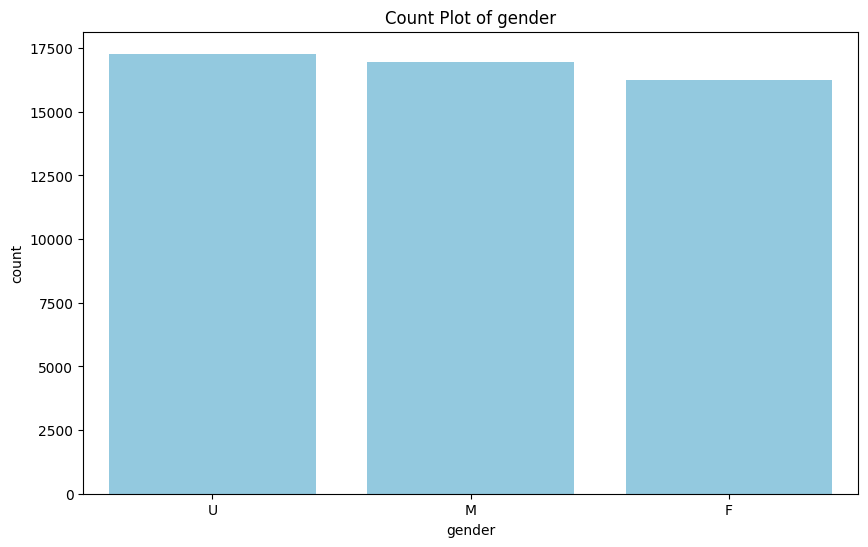

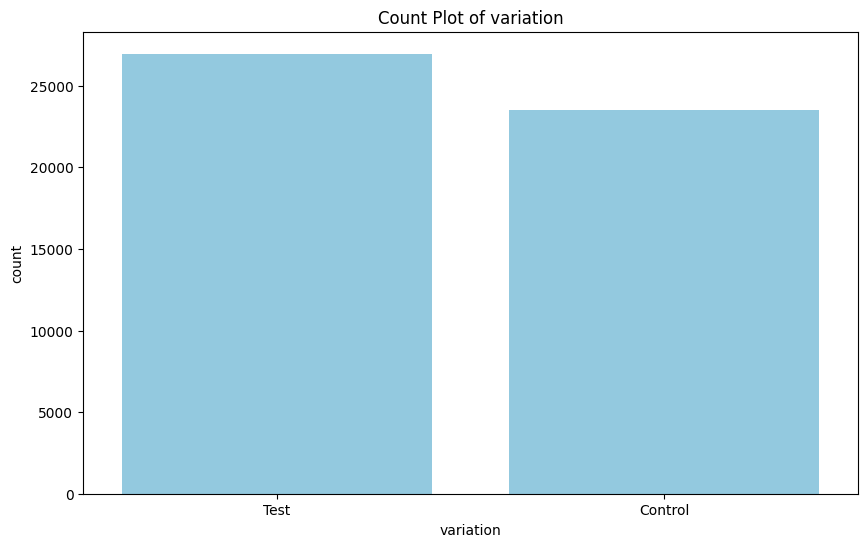

In [47]:
# Count plots for categorical variables
categorical_columns = ['gender', 'variation']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_clients_tested[column], color = 'skyblue')
    plt.title(f'Count Plot of {column}')
    plt.show()

In [48]:
# Calculate percentages for 'gender' column
gender_counts = df_clients_tested['gender'].value_counts(normalize=True) * 100
gender_percentages = pd.DataFrame(gender_counts).reset_index()
gender_percentages.columns = ['Gender', 'Percentage']
print("Gender Distribution Percentage:")
print(gender_percentages)

# Calculate percentages for 'Variation' column
variation_counts = df_clients_tested['variation'].value_counts(normalize=True) * 100
variation_percentages = pd.DataFrame(variation_counts).reset_index()
variation_percentages.columns = ['variation', 'Percentage']
print("\nVariation Distribution Percentage:")
print(variation_percentages)

Gender Distribution Percentage:
  Gender  Percentage
0      U   34.229916
1      M   33.566392
2      F   32.203692

Variation Distribution Percentage:
  variation  Percentage
0      Test   53.400808
1   Control   46.599192


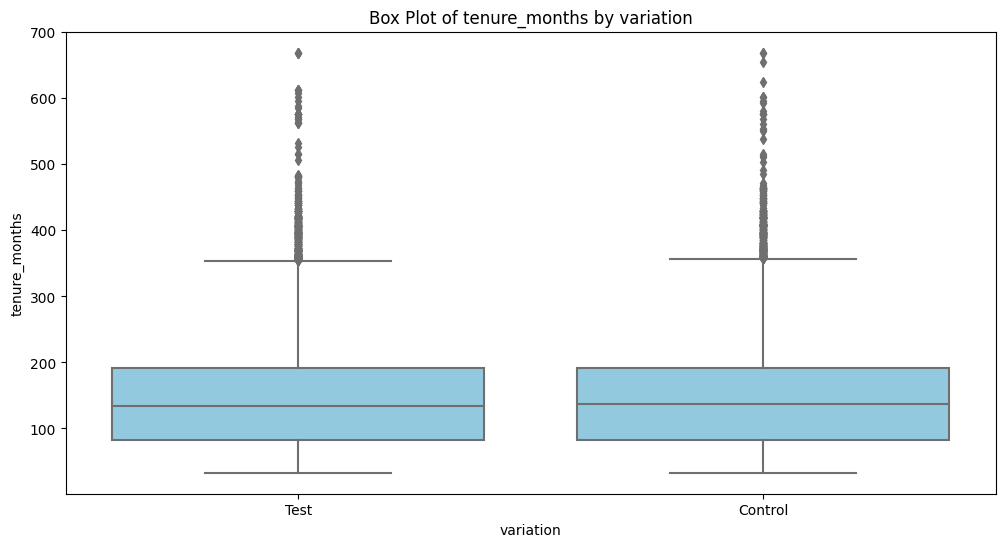

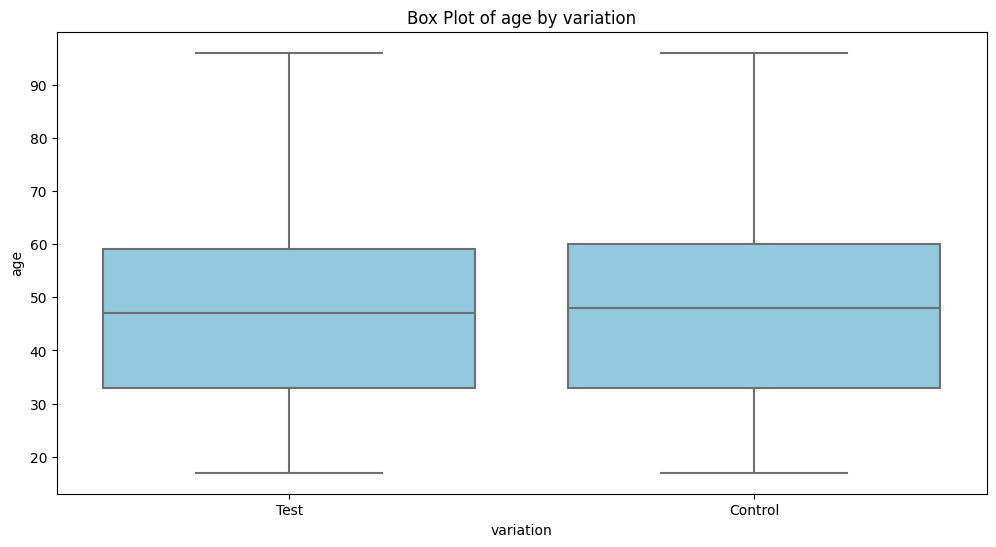

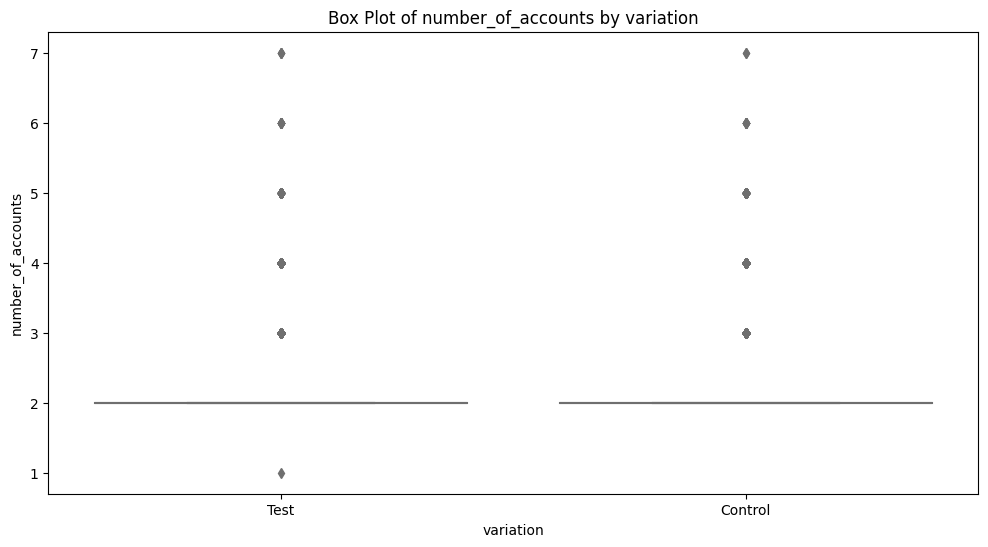

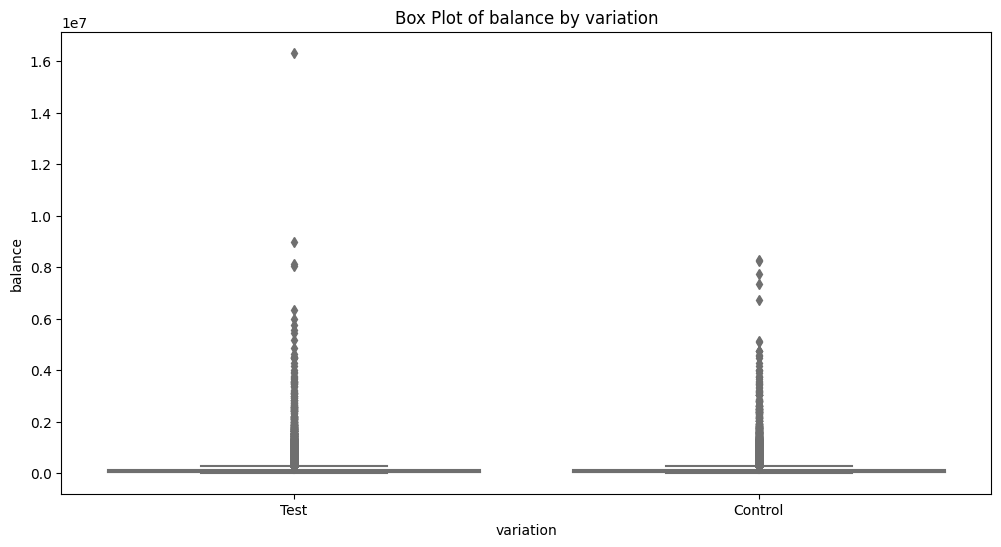

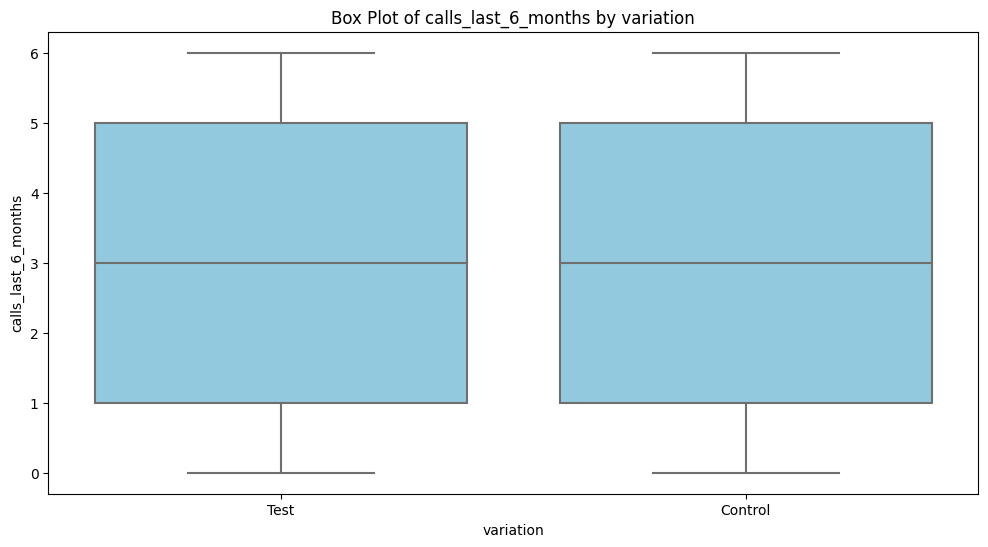

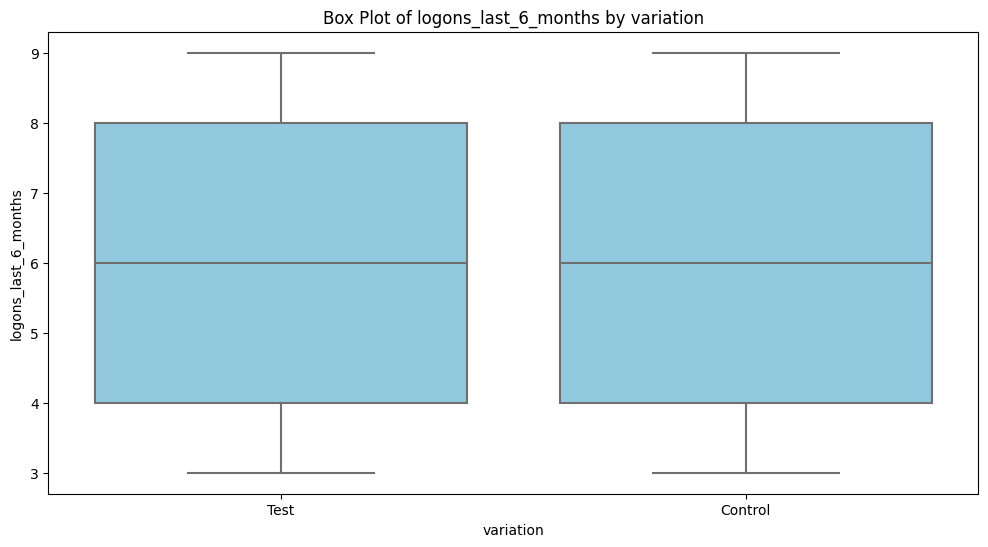

In [49]:
# Box plots to compare numerical variables across the variation categories
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='variation', y=column, data=df_clients_tested, color='skyblue')
    plt.title(f'Box Plot of {column} by variation')
    plt.show()

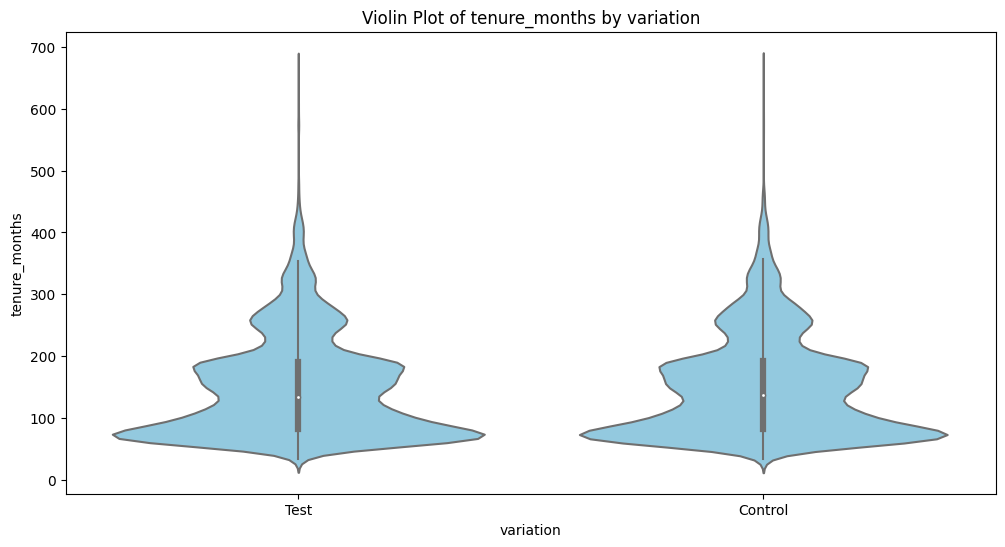

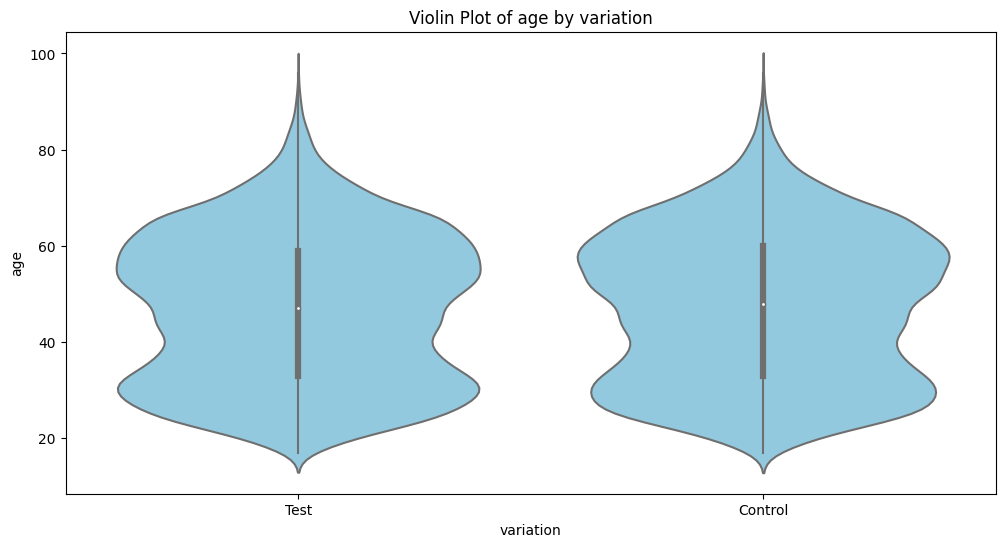

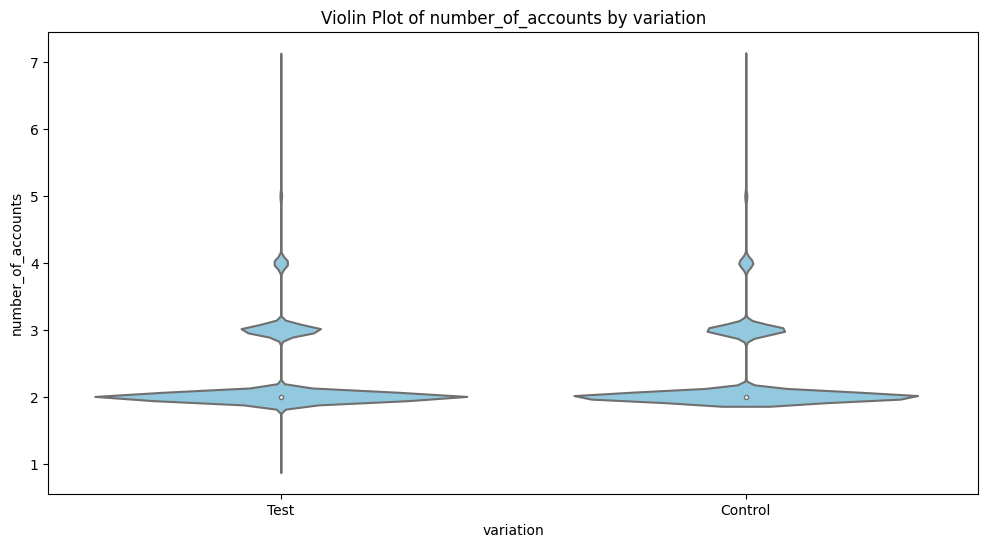

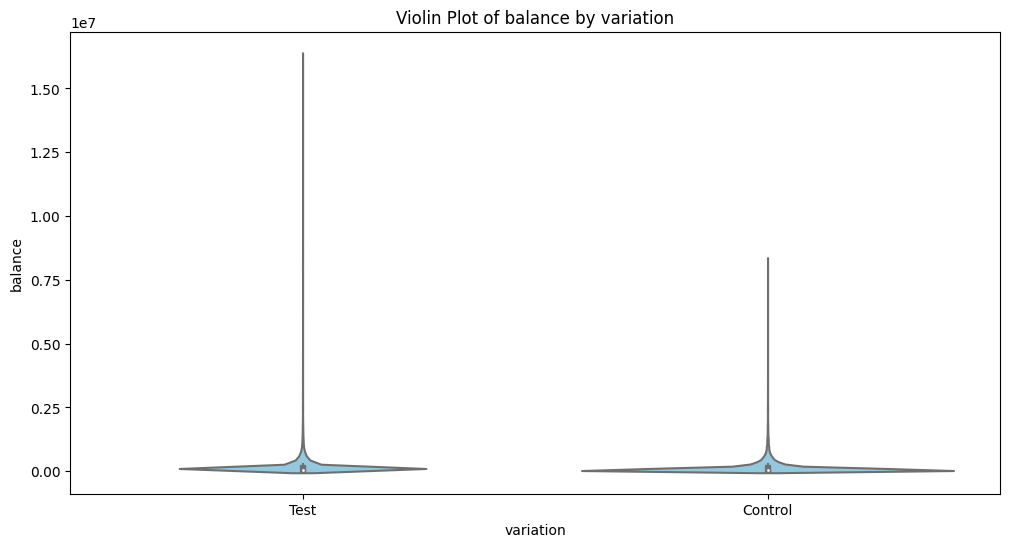

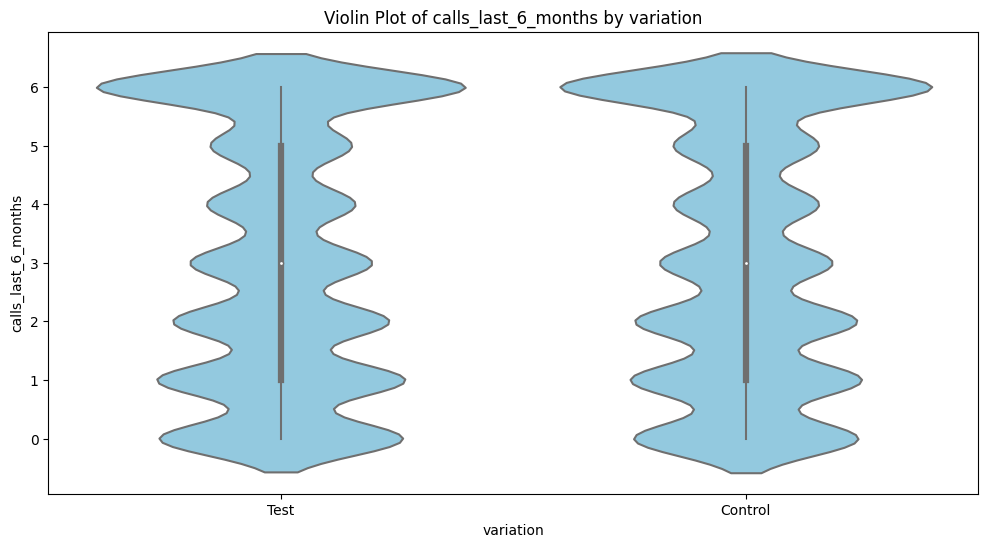

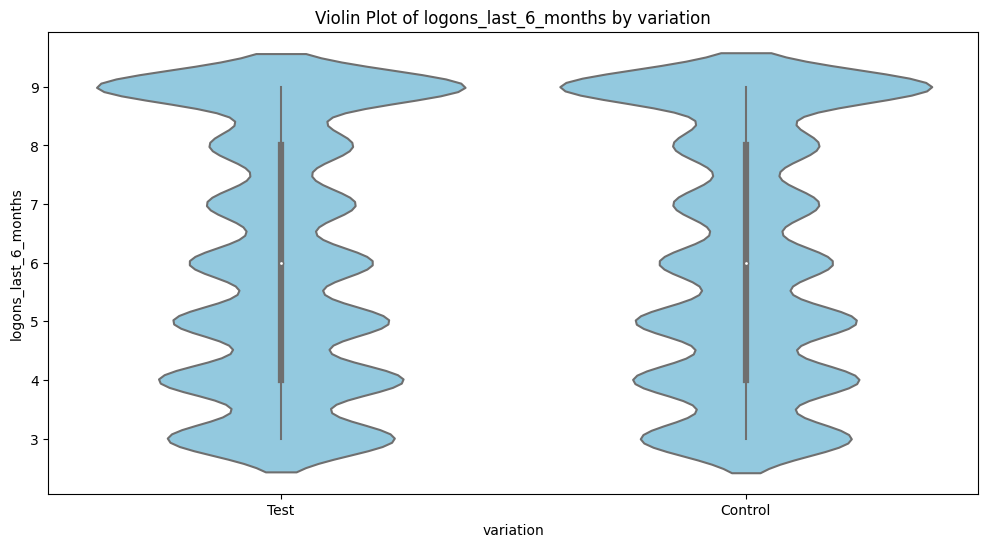

In [50]:
# Violing plots to compare numerical variables distributions across the variation categories
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='variation', y=column, data=df_clients_tested, color='skyblue')
    plt.title(f'Violin Plot of {column} by variation')
    plt.show()

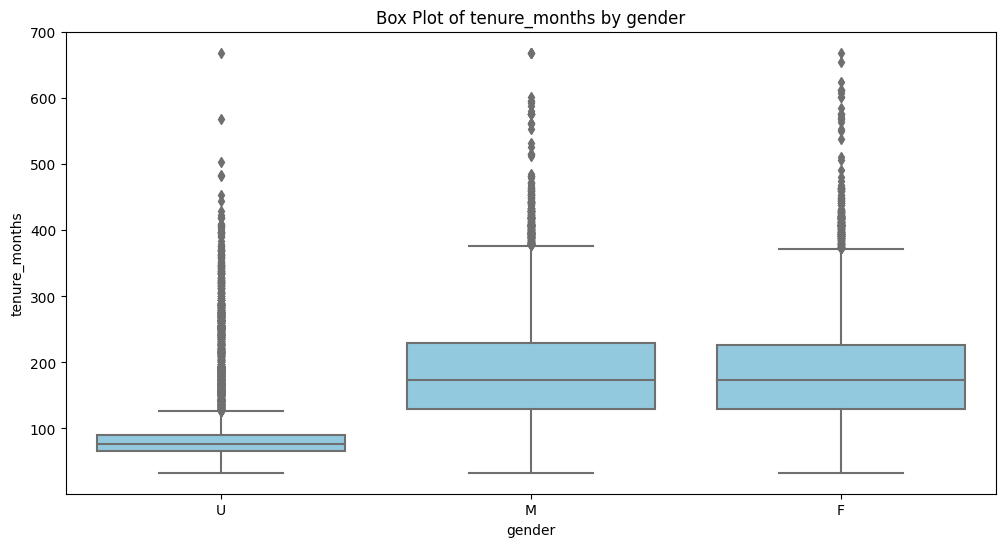

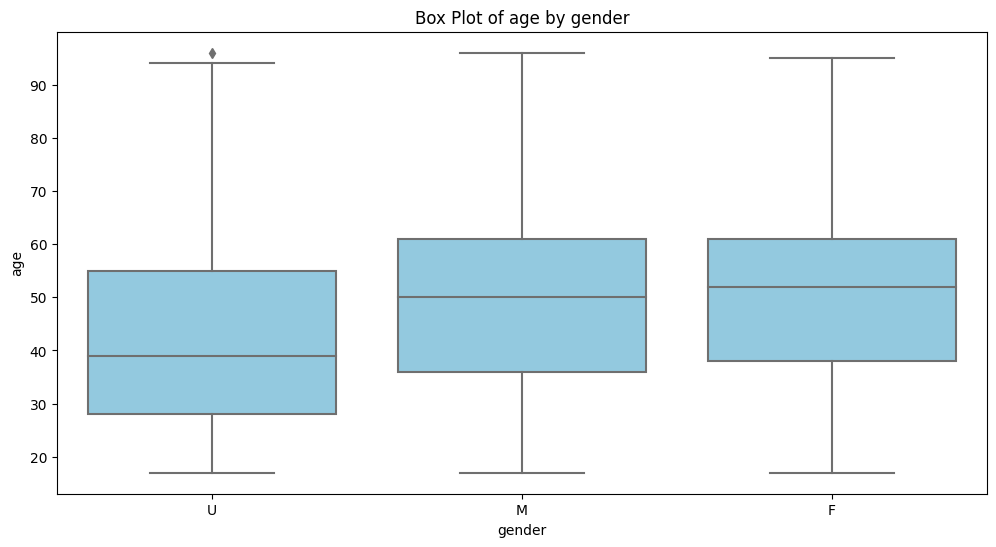

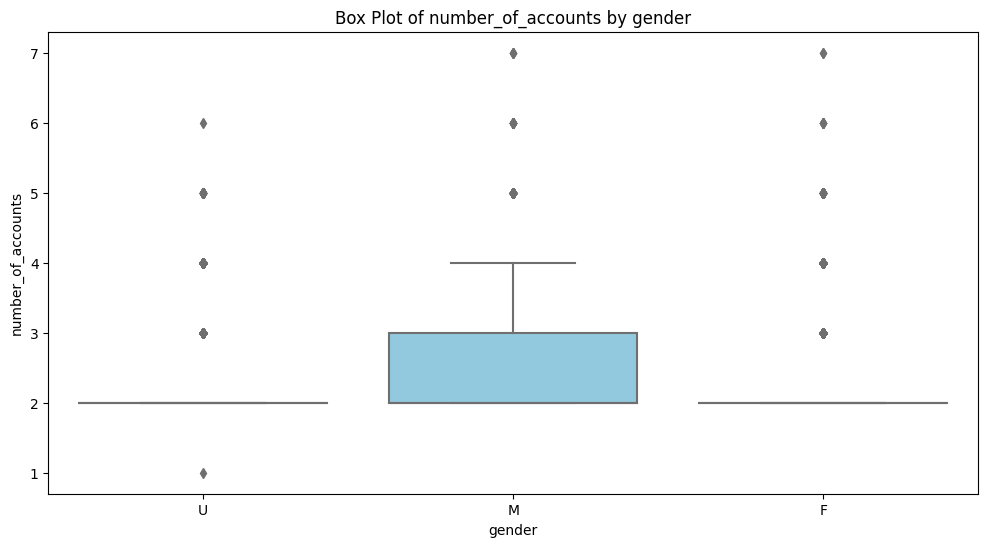

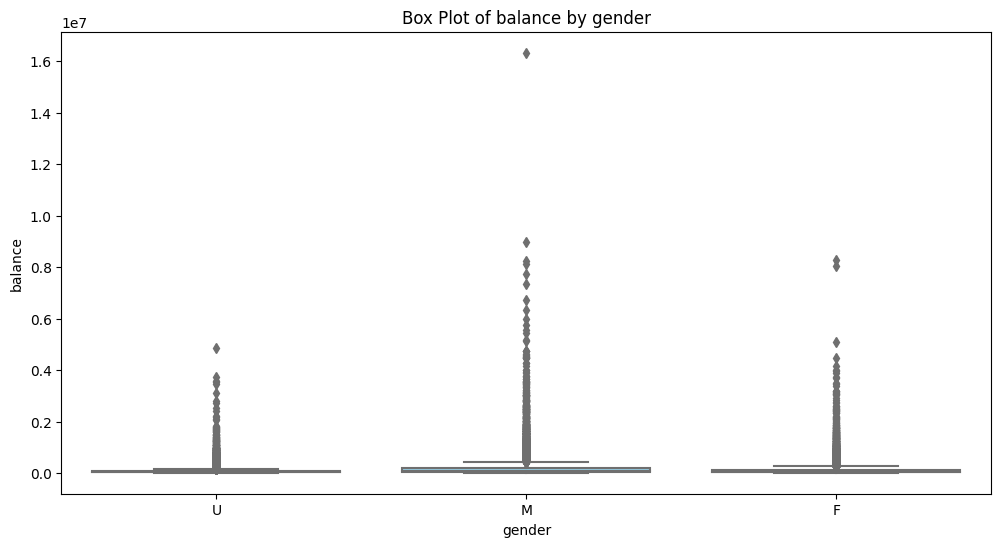

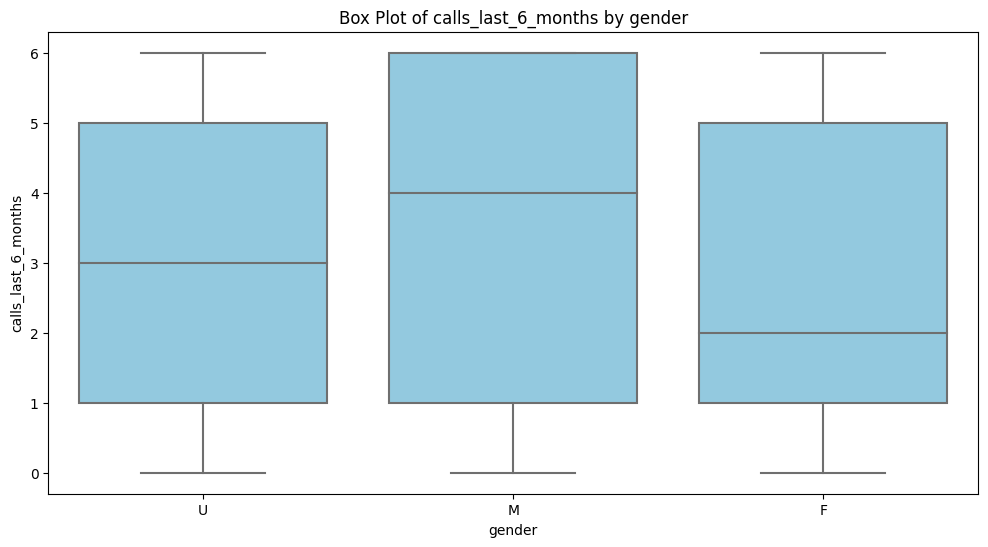

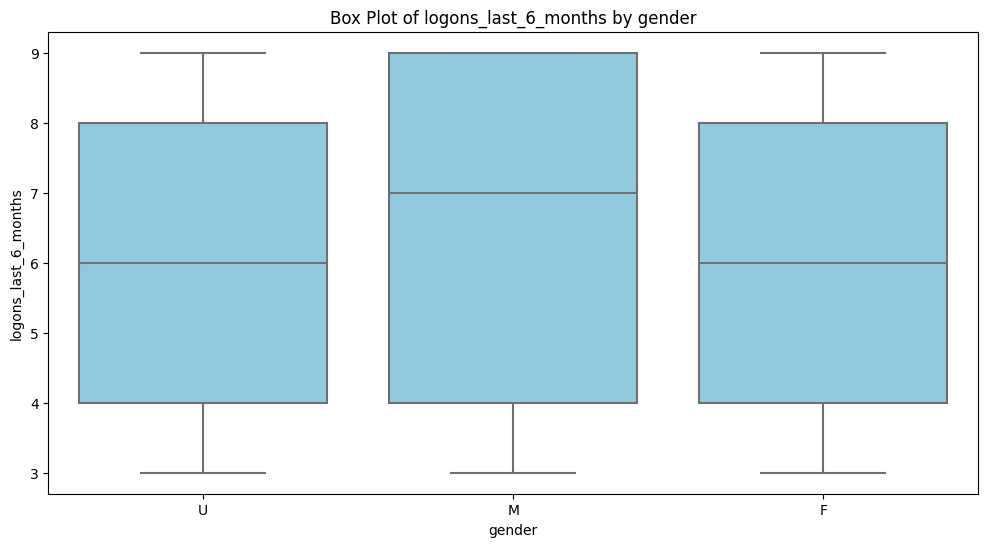

In [51]:
# Box plots to compare numerical variables across the gender categories
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='gender', y=column, data=df_clients_tested, color='skyblue')
    plt.title(f'Box Plot of {column} by gender')
    plt.show()

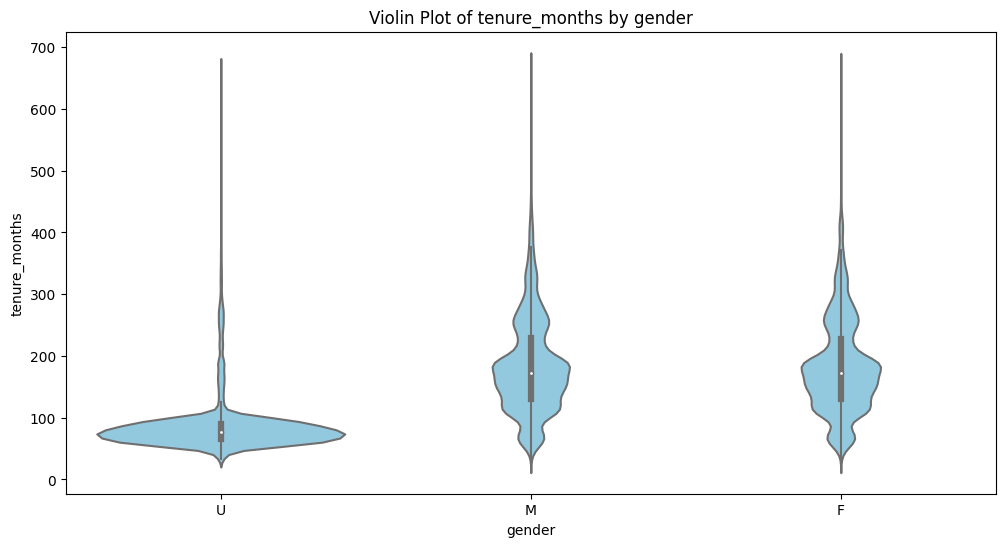

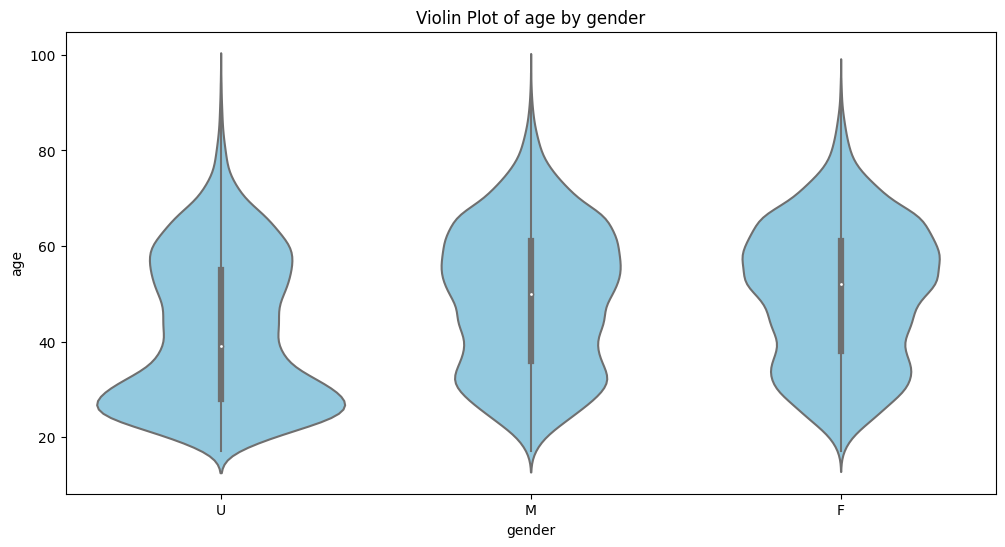

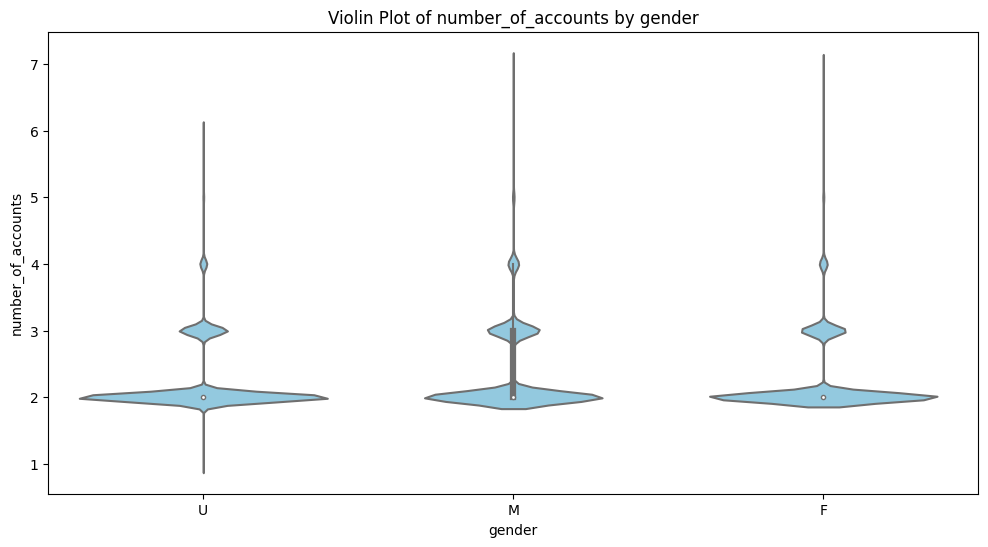

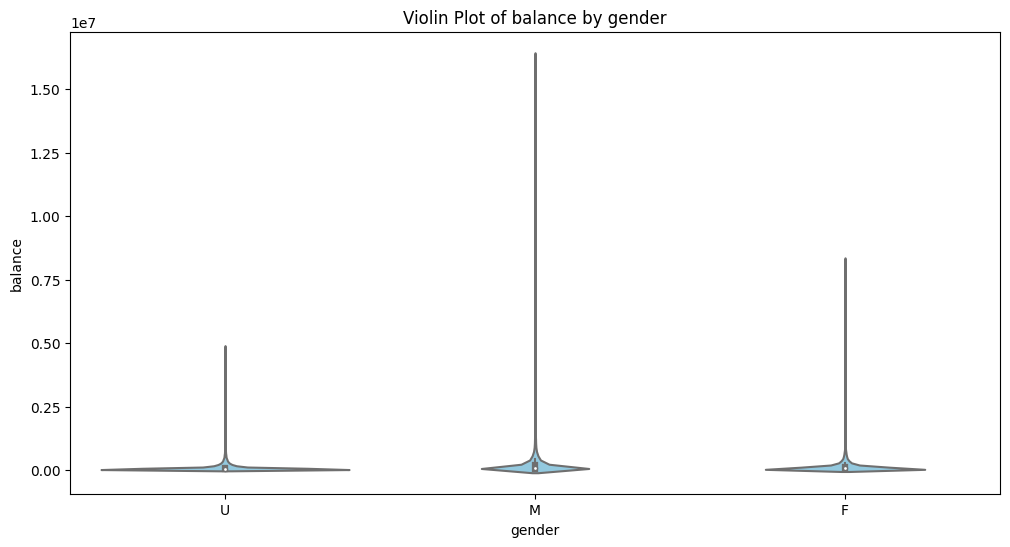

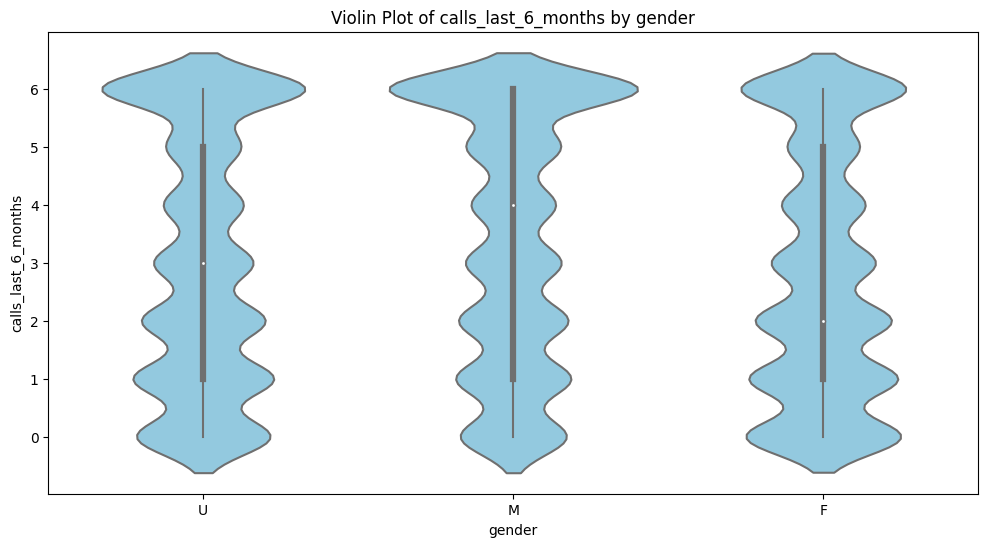

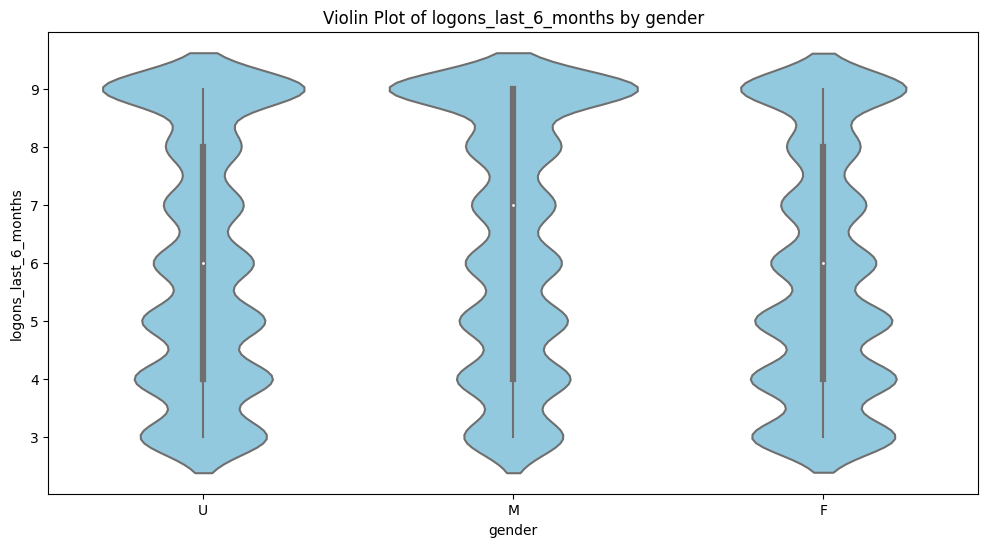

In [52]:
# Violing plots to compare numerical variables distributions across the variation categories
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='gender', y=column, data=df_clients_tested, color='skyblue')
    plt.title(f'Violin Plot of {column} by gender')
    plt.show()

#### <a id="digital-footprints-dataset-anchor"></a>Digital Footprints Dataset (df_web_data)

In [53]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [54]:
df_web_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


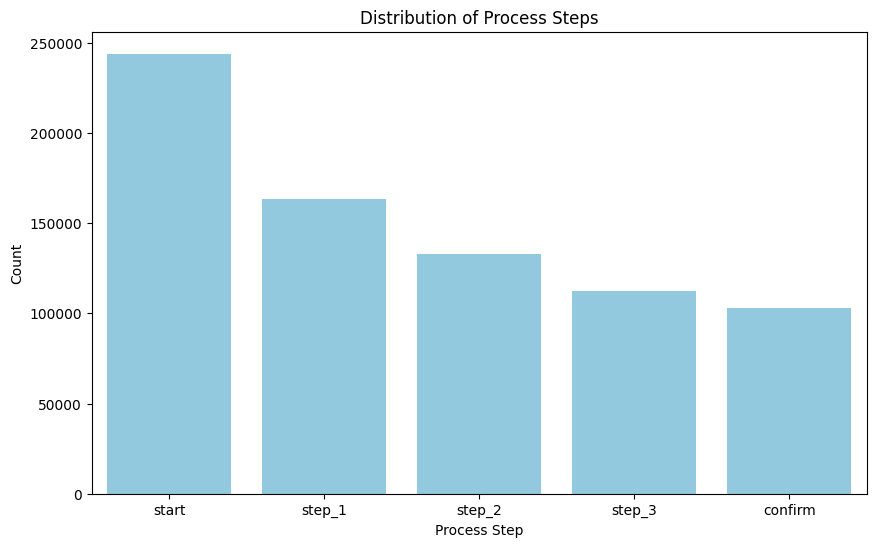

In [55]:
# Histogram of process steps

order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

plt.figure(figsize=(10, 6))
sns.countplot(x='process_step', data=df_web_data, order = order, color = 'skyblue')
plt.title('Distribution of Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.show()

In [56]:
# Number of unique visitors who successfully completed each step
completion_counts = df_web_data.groupby('process_step')['visitor_id'].nunique()

# Total number of unique visitors who started at each step
start_counts = df_web_data[df_web_data['process_step'] == 'start']['visitor_id'].nunique()

# Completion rates for each step
completion_rates = completion_counts / start_counts

# Order of steps
order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Reindex the completion rates DataFrame using the desired order
completion_rates_sorted = completion_rates.reindex(order)

print("Step Completion Rates:")
print(completion_rates_sorted)


Step Completion Rates:
process_step
start      1.000000
step_1     0.859811
step_2     0.779876
step_3     0.723776
confirm    0.652894
Name: visitor_id, dtype: float64


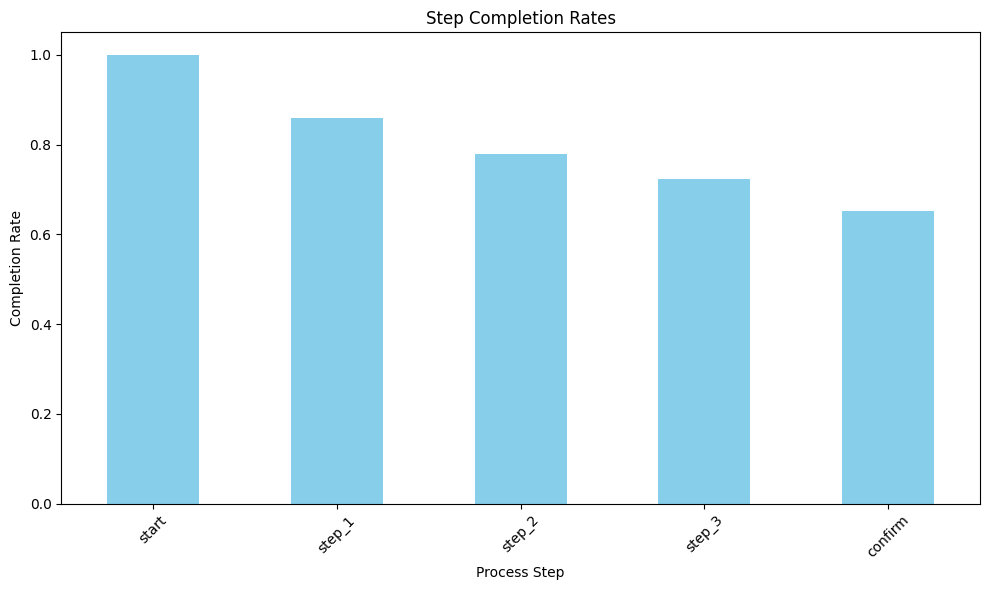

In [57]:
completion_rates_sorted = pd.Series({
    'start': 1.000000,
    'step_1': 0.859811,
    'step_2': 0.779876,
    'step_3': 0.723776,
    'confirm': 0.652894
}, name='visitor_id')

# Plotting the completion rates
completion_rates_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Step Completion Rates')
plt.xlabel('Process Step')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
# Calculate the drop from one step to the next
drop_from_previous_step = completion_rates_sorted.diff()

# Drop the first row as it represents the drop from a non-existent previous step
drop_from_previous_step = drop_from_previous_step.dropna()

print("Drop from Previous Step:")
print(drop_from_previous_step)

Drop from Previous Step:
step_1    -0.140189
step_2    -0.079935
step_3    -0.056100
confirm   -0.070882
Name: visitor_id, dtype: float64


#### Start Step:

* Completion Rate: 100%
* Drop from Previous Step: N/A (This is the initial step)

#### Step 1:

* Completion Rate: 85.98%
* Drop from Previous Step: -14.02% (Approximately 14.02% drop from "start" to "step_1")

#### Step 2:

* Completion Rate: 77.99%
* Drop from Previous Step: -7.99% (Approximately 7.99% drop from "step_1" to "step_2")

#### Step 3:

* Completion Rate: 72.38%
* Drop from Previous Step: -5.61% (Approximately 5.61% drop from "step_2" to "step_3")

#### Confirm Step:

* Completion Rate: 65.29%
* Drop from Previous Step: -7.09% (Approximately 7.09% drop from "step_3" to "confirm")

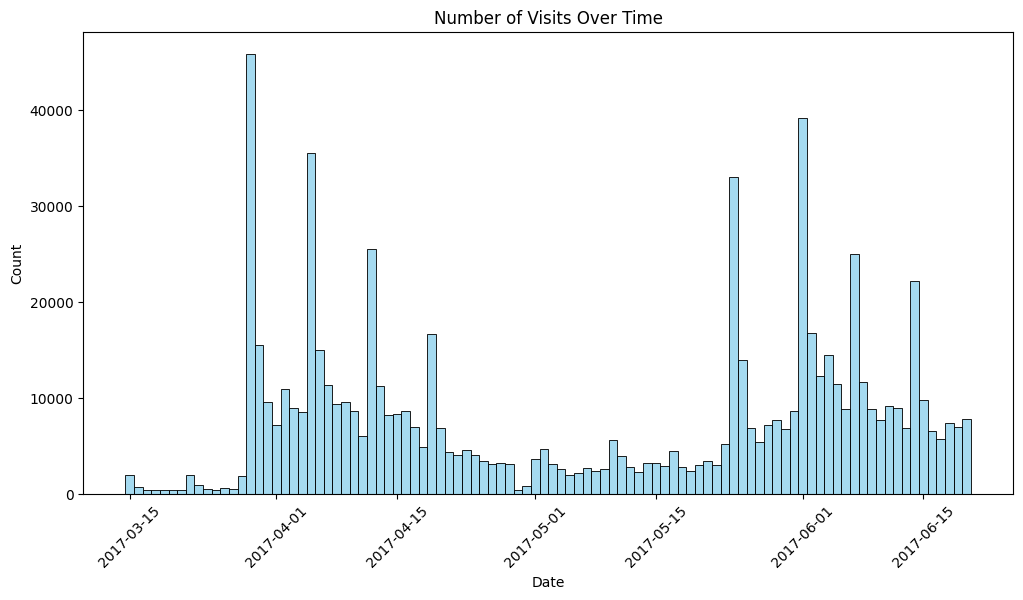

In [59]:
# Extracting date and time components from the datetime column
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])
df_web_data['date'] = df_web_data['date_time'].dt.date
df_web_data['time'] = df_web_data['date_time'].dt.time

# Plotting visits over time
plt.figure(figsize=(12, 6))
sns.histplot(df_web_data['date'], kde=False, color='skyblue')
plt.title('Number of Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [60]:
df_web_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755405 entries, 0 to 412263
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     755405 non-null  int64         
 1   visitor_id    755405 non-null  object        
 2   visit_id      755405 non-null  object        
 3   process_step  755405 non-null  object        
 4   date_time     755405 non-null  datetime64[ns]
 5   date          755405 non-null  object        
 6   time          755405 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 46.1+ MB


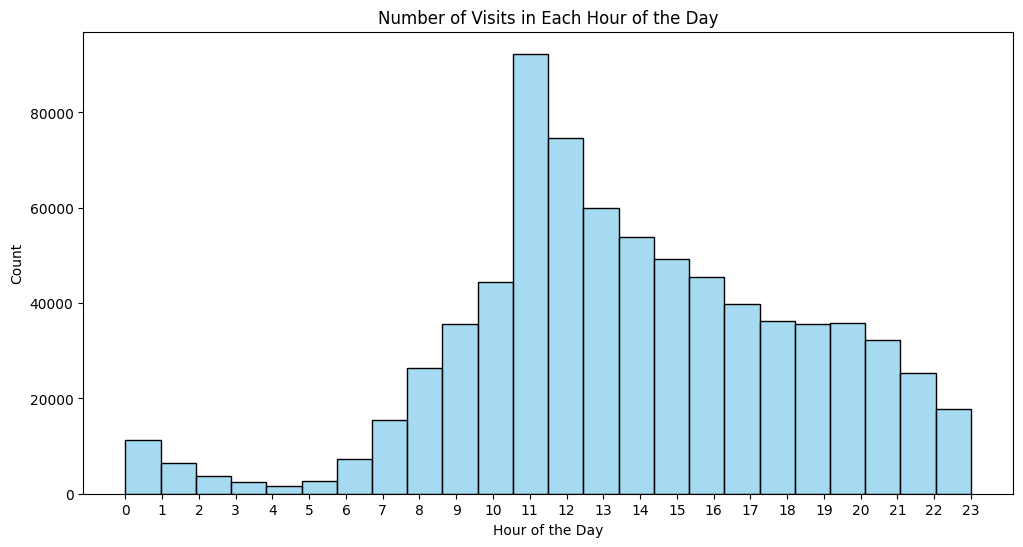

In [61]:
df_web_data['hour'] = df_web_data['date_time'].dt.hour

# Plotting visits in each hour of the day
plt.figure(figsize=(12, 6))
sns.histplot(df_web_data['hour'], bins=24, kde=False, color='skyblue')
plt.title('Number of Visits in Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(24))  # Setting x-ticks to show each hour
plt.show()

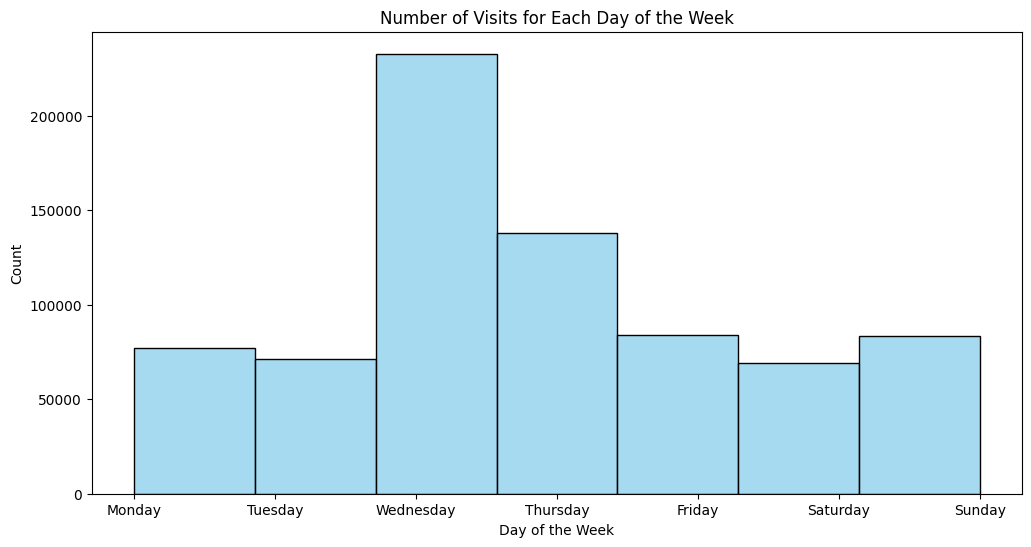

In [62]:
# Extracting day of the week component from the datetime column
df_web_data['day_of_week'] = df_web_data['date_time'].dt.dayofweek

# Mapping day of the week integers to corresponding names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting visits for each day of the week
plt.figure(figsize=(12, 6))
sns.histplot(df_web_data['day_of_week'], bins=7, kde=False, color='skyblue')
plt.title('Number of Visits for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(range(7), labels=day_names)  # Setting x-ticks to show day names                   
plt.show()


---

## <a id="ab-testing-analysis-anchor"></a>A/B Testing Analysis

### <a id="kpis-anchor"></a>KPIs:

#### -Completion Rate: 
The proportion of users who reach the final ‘confirm’ step.
* Completion Rate by Age Group
* Completion Rate by Gender

#### -Time Spent on Each Step: 
The average duration users spend on each step.

#### -Error Rates: 
If there’s a step where users go back to a previous step, it may indicate confusion or an error (clients moving from a later step to an earlier one).
    
#### Additional KPIs worth exploring:

#### -Step Abandonment Rate: 
The proportion of users who abandon the process at each step. This will help identify specific steps where users are most likely to drop off.
       
#### -Tenure Influence: 
Analyzing the completion rate and time spent on each step based on the user's tenure (years and months). Longer tenure might correlate with different behaviors.
       
#### -Success Rate of First-Time Users: 
The proportion of users who complete the process on their first attempt without any step repetitions or errors.

In [63]:
# Merging the client dataset with the digital footprint df

df_merged = pd.merge(df_clients_tested, df_web_data, on='client_id')

In [64]:
df_merged.head()

,client_id,variation,tenure_years,tenure_months,age,gender,number_of_accounts,balance,calls_last_6_months,logons_last_6_months,visitor_id,visit_id,process_step,date_time,date,time,hour,day_of_week
0,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07,15,0
1,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51,15,0
2,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22,15,0
3,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13,15,0
4,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04,15,0


#### <a id="completion-rates-anchor"></a>Completion Rates

In [65]:
# Filter for the final step
final_step_df = df_merged[df_merged['process_step'] == 'confirm']

# Total users in each group
total_users = df_merged[['client_id', 'variation']].drop_duplicates().groupby('variation').size()

# Users who reached the final step
completed_users = final_step_df[['client_id', 'variation']].drop_duplicates().groupby('variation').size()

# Calculate completion rate
completion_rate = (completed_users / total_users) * 100

print(completion_rate)

variation
Control    65.579972
Test       69.292682
dtype: float64


In [66]:
control_completion_rate = 65.579972
test_completion_rate = 69.292682

percentage_increase = test_completion_rate - control_completion_rate

print(f"Percentage Increase: {percentage_increase:.2f}%")

Percentage Increase: 3.71%


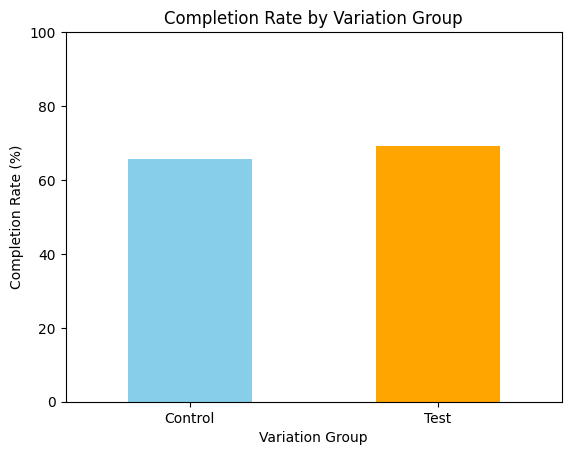

In [67]:
completion_rate.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Completion Rate by Variation Group')
plt.xlabel('Variation Group')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()

The test group has a higher completion rate (69.29%) compared to the control group (65.58%). This indicates that the variation being tested is more effective in guiding users to complete the process and reach the final 'confirm' step.

Percentage increase in the completion rate from the control group to the test group: 3.71%

In [68]:
# Completion rate by gender within control and test groups

# Total users in each variation and gender group
total_users_by_group = df_merged[['client_id', 'variation', 'gender']].drop_duplicates().groupby(['variation', 'gender']).size()

# Users who reached the final step in each variation and gender group
completed_users_by_group = final_step_df[['client_id', 'variation', 'gender']].drop_duplicates().groupby(['variation', 'gender']).size()

# Calculate completion rate
completion_rate_by_group = (completed_users_by_group / total_users_by_group) * 100

print(completion_rate_by_group)

variation  gender
Control    F         63.370012
           M         66.461731
           U         66.783130
Test       F         66.865535
           M         70.736326
           U         70.176953
dtype: float64


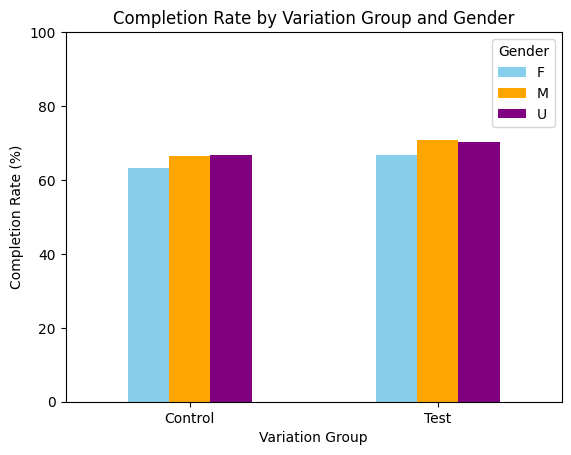

In [69]:
completion_rate_by_group.unstack().plot(kind='bar', stacked=False, color=['skyblue', 'orange', 'purple'])
plt.title('Completion Rate by Variation Group and Gender')
plt.xlabel('Variation Group')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

##### Higher Completion Rates in Test Group: 

* For all gender groups (Females, Males, and Unknown/Unspecified), the completion rates are higher in the Test group compared to the Control group. This suggests that the variation being tested might be more effective in leading users to the final 'confirm' step.

##### Gender Comparison:

* Females: There is a slight increase in the completion rate from the control group (63.37%) to the test group (66.87%).
* Males: There is a noticeable increase in the completion rate from the control group (66.46%) to the test group (70.74%).
* Unknown/Unspecified: The completion rate also increases from the control group (66.78%) to the test group (70.18%).

These results suggest that the test variation is generally more effective across all gender groups, with males showing the largest increase in completion rate when exposed to the test variation.

In [70]:
df_clients_tested['age'].describe()

count    50488.000000
mean        47.058430
std         15.527939
min         17.000000
25%         33.000000
50%         48.000000
75%         59.000000
max         96.000000
Name: age, dtype: float64

In [71]:
# Completion rate by age groups within control and test groups

# Define age groups 
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']

df_merged['age_group'] = pd.cut(df_merged['age'], bins=bins, labels=labels, right=False)
final_step_df['age_group'] = pd.cut(final_step_df['age'], bins=bins, labels=labels, right=False)


total_users_by_age_group = df_merged[['client_id', 'variation', 'age_group']].drop_duplicates().groupby(['variation', 'age_group']).size()

completed_users_by_age_group = final_step_df[['client_id', 'variation', 'age_group']].drop_duplicates().groupby(['variation', 'age_group']).size()

completion_rate_by_age_group = (completed_users_by_age_group / total_users_by_age_group) * 100

print(completion_rate_by_age_group)

variation  age_group 
Control    18-24         69.113757
           25-34         67.106892
           35-44         67.442449
           45-54         67.189884
           55-64         66.294992
           65 or over    56.724481
Test       18-24         74.604042
           25-34         72.041498
           35-44         70.455541
           45-54         69.070997
           55-64         69.056405
           65 or over    62.056555
dtype: float64


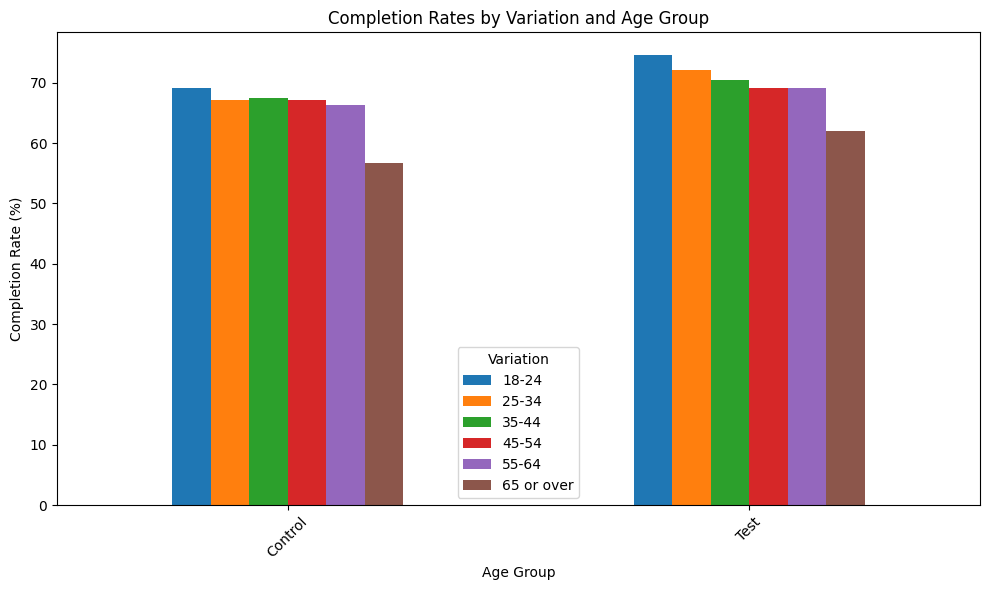

In [72]:
completion_rate_by_age_group = completion_rate_by_age_group.unstack()

# Plot
completion_rate_by_age_group.plot(kind='bar', figsize=(10, 6))
plt.title('Completion Rates by Variation and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.tight_layout()
plt.show()

The completion rates in the test group are higher across all age groups compared to the control group.

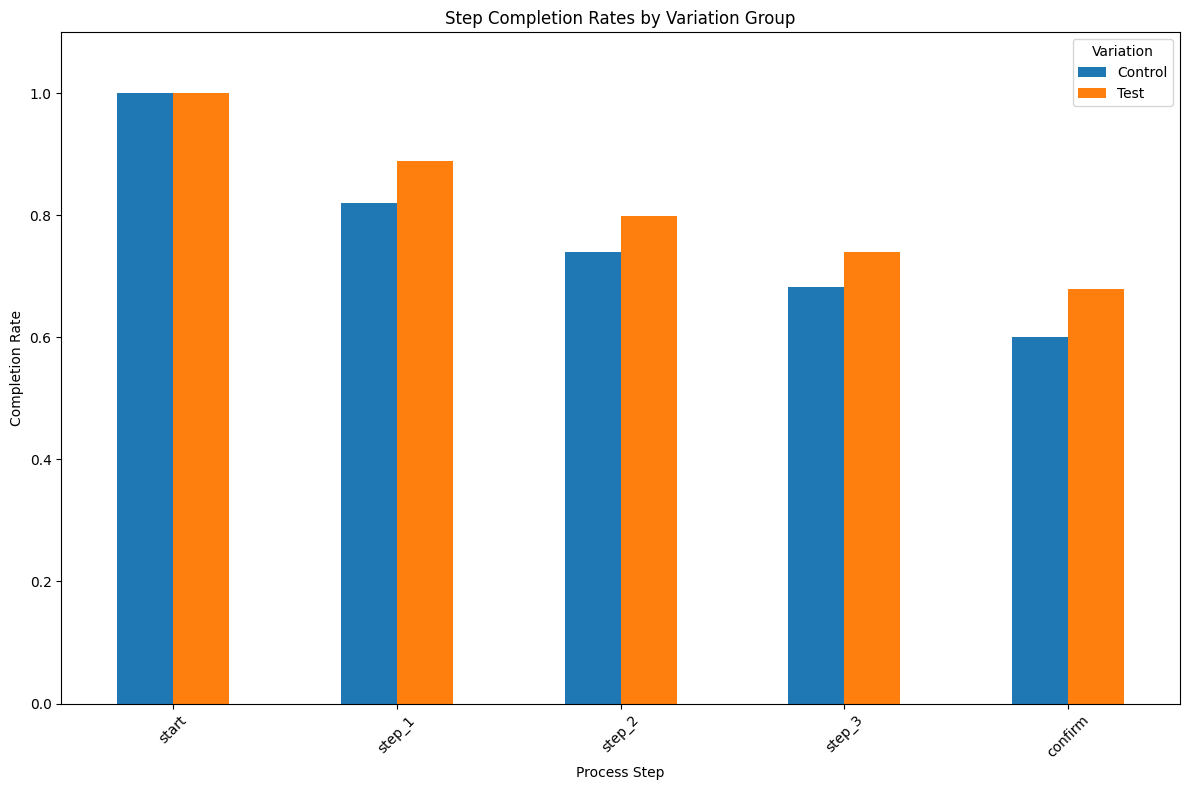

In [73]:
# Calculate the number of unique visitors who successfully completed each step for each variation group
completion_counts = df_merged.groupby(['variation', 'process_step'])['visitor_id'].nunique().unstack()

# Calculate the total number of unique visitors who started the process for each variation group
start_counts = df_merged[df_merged['process_step'] == 'start'].groupby('variation')['visitor_id'].nunique()

# Completion rates for each step within each variation group
completion_rates = completion_counts.div(start_counts, axis=0)

# Reindex the completion rates DataFrame using the desired order
order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
completion_rates_sorted = completion_rates.reindex(columns=order)

# Plotting the completion rates by variation group
completion_rates_sorted.T.plot(kind='bar', figsize=(12, 8))
plt.title('Step Completion Rates by Variation Group')
plt.xlabel('Process Step')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)  # Set y-axis limits to show the full range of completion rates
plt.legend(title='Variation')
plt.tight_layout()
plt.show()

In [74]:
print(completion_rates_sorted)

process_step  start    step_1    step_2    step_3   confirm
variation                                                  
Control         1.0  0.819558  0.739683  0.683087  0.600741
Test            1.0  0.889229  0.799589  0.740235  0.678793


##### Higher Completion Rates in Test Group:

Across all steps, the Test group consistently shows higher completion rates compared to the Control group. This suggests that the changes or features introduced in the Test variation are beneficial and help reduce drop-offs at each step.

##### Positive Impact of Test Variation:

The Test variation seems to make a substantial positive impact, particularly noticeable from the very first step. This early advantage is carried through the subsequent steps, culminating in a significantly higher completion rate at the final confirmation step.



#### <a id="time-spent-on-each-step-anchor"></a>Time Spent on Each Step

In [75]:
df_merged.head(5)

,client_id,variation,tenure_years,tenure_months,age,gender,number_of_accounts,balance,calls_last_6_months,logons_last_6_months,visitor_id,visit_id,process_step,date_time,date,time,hour,day_of_week,age_group
0,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07,15,0,65 or over
1,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51,15,0,65 or over
2,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22,15,0,65 or over
3,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13,15,0,65 or over
4,9988021,Test,5,64,79,U,2,189023.86,1,4,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04,15,0,65 or over


In [76]:
df_merged.isnull().sum()

client_id               0
variation               0
tenure_years            0
tenure_months           0
age                     0
gender                  0
number_of_accounts      0
balance                 0
calls_last_6_months     0
logons_last_6_months    0
visitor_id              0
visit_id                0
process_step            0
date_time               0
date                    0
time                    0
hour                    0
day_of_week             0
age_group               0
dtype: int64

In [77]:
# Total time spent in each step
total_time_spent_by_variation = df_merged.groupby(['variation', 'process_step'])['date_time'].apply(lambda x: (x.max() - x.min()).total_seconds())

# Calculate number of unique visitors who completed each step for each variation
unique_visitors_completed_step_by_variation = df_merged[df_merged['process_step'] != 'start'].groupby(['variation', 'process_step'])['client_id'].nunique()

# Calculate average time spent in each step for each variation
average_time_spent_by_variation = total_time_spent_by_variation / unique_visitors_completed_step_by_variation

# Reindex the order
average_time_spent_by_variation = average_time_spent_by_variation.reindex(order, level='process_step')

average_time_spent_by_variation 


variation  process_step
Control    start                  NaN
           step_1          420.198541
           step_2          454.044194
           step_3          485.924040
           confirm         548.549874
Test       start                  NaN
           step_1          348.806801
           step_2          380.282671
           step_3          404.132018
           confirm         451.592442
dtype: float64

In [78]:
data = {
    ('Control', 'start'): float('NaN'),
    ('Control', 'step_1'): 420.198541,
    ('Control', 'step_2'): 454.044194,
    ('Control', 'step_3'): 485.924040,
    ('Control', 'confirm'): 548.549874,
    ('Test', 'start'): float('NaN'),
    ('Test', 'step_1'): 348.806801,
    ('Test', 'step_2'): 380.282671,
    ('Test', 'step_3'): 404.132018,
    ('Test', 'confirm'): 451.592442
}

# Creating a pandas Series
series = pd.Series(data)

# Extracting steps for both groups
control_steps = series['Control']
test_steps = series['Test']

# Calculating time taken for each step transition in Control group
control_transitions = {
    'start to step_1': control_steps['step_1'] - control_steps['start'],
    'step_1 to step_2': control_steps['step_2'] - control_steps['step_1'],
    'step_2 to step_3': control_steps['step_3'] - control_steps['step_2'],
    'step_3 to confirm': control_steps['confirm'] - control_steps['step_3']
}

# Calculating time taken for each step transition in Test group
test_transitions = {
    'start to step_1': test_steps['step_1'] - test_steps['start'],
    'step_1 to step_2': test_steps['step_2'] - test_steps['step_1'],
    'step_2 to step_3': test_steps['step_3'] - test_steps['step_2'],
    'step_3 to confirm': test_steps['confirm'] - test_steps['step_3']
}

# Creating DataFrames for the transitions
control_df = pd.DataFrame(control_transitions.items(), columns=['process_step', 'average_time_taken'])
test_df = pd.DataFrame(test_transitions.items(), columns=['process_step', 'average_time_taken'])

# Printing the results
print("Control Group Transitions:")
print(control_df)
print("\nTest Group Transitions:")
print(test_df)

Control Group Transitions:
        process_step  average_time_taken
0    start to step_1                 NaN
1   step_1 to step_2           33.845653
2   step_2 to step_3           31.879846
3  step_3 to confirm           62.625834

Test Group Transitions:
        process_step  average_time_taken
0    start to step_1                 NaN
1   step_1 to step_2           31.475870
2   step_2 to step_3           23.849347
3  step_3 to confirm           47.460424


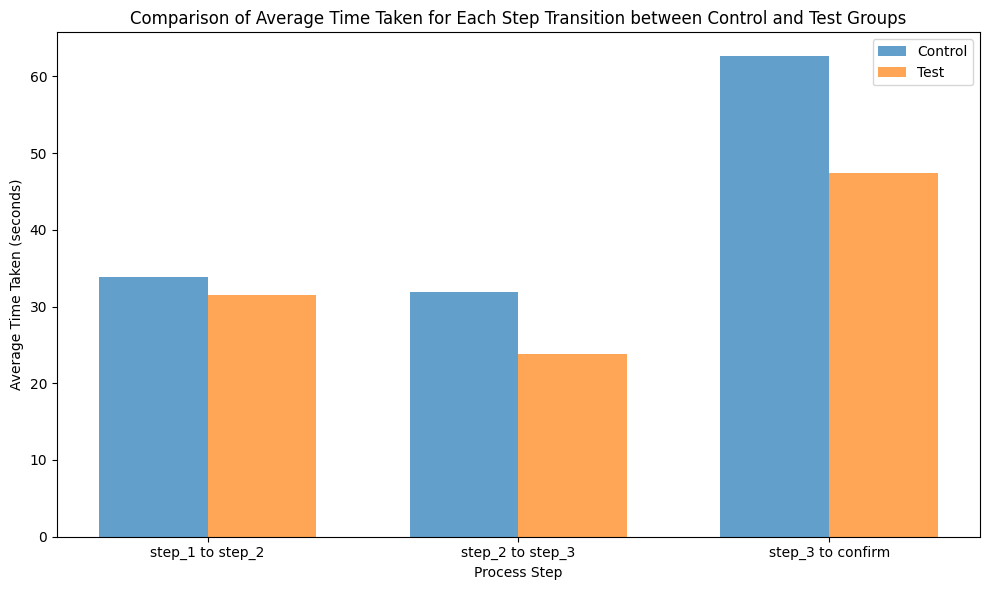

In [79]:
# Remove the 'start to step_1' from both DataFrames
control_df = control_df[control_df['process_step'] != 'start to step_1']
test_df = test_df[test_df['process_step'] != 'start to step_1']

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the x positions for the bars
x_control = np.arange(len(control_df))
x_test = np.arange(len(test_df)) + 0.35

# Plotting Control Group Transitions
plt.bar(x_control, control_df['average_time_taken'], width=0.35, alpha=0.7, label='Control')
# Plotting Test Group Transitions
plt.bar(x_test, test_df['average_time_taken'], width=0.35, alpha=0.7, label='Test')

# Adding labels and title
plt.title('Comparison of Average Time Taken for Each Step Transition between Control and Test Groups')
plt.xlabel('Process Step')
plt.ylabel('Average Time Taken (seconds)')
plt.xticks(x_control + 0.175, control_df['process_step'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

##### Step 1 to Step 2:

* Control Variation: Users spent an average of approximately 33.85 seconds transitioning from Step 1 to Step 2.
* Test Variation: Users spent an average of approximately 31.48 seconds transitioning from Step 1 to Step 2.

Interpretation: The Test variation shows a decrease in the average time taken to transition from Step 1 to Step 2 compared to the Control variation. This suggests that users in the Test group progressed more swiftly from Step 1 to Step 2 compared to the Control group.

##### Step 2 to Step 3:

* Control Variation: Users spent an average of approximately 31.88 seconds transitioning from Step 2 to Step 3.
* Test Variation: Users spent an average of approximately 23.85 seconds transitioning from Step 2 to Step 3.

Interpretation: The Test variation exhibits a significant decrease in the average time taken to transition from Step 2 to Step 3 compared to the Control variation. Users in the Test group progressed much more swiftly from Step 2 to Step 3, indicating a substantial improvement in efficiency or user experience for this transition.

##### Step 3 to Confirm:

* Control Variation: Users spent an average of approximately 62.63 seconds transitioning from Step 3 to Confirm.
* Test Variation: Users spent an average of approximately 47.46 seconds transitioning from Step 3 to Confirm.

Interpretation: The Test variation demonstrates a substantial decrease in the average time taken to transition from Step 3 to Confirm compared to the Control variation. Users in the Test group completed the transition from Step 3 to Confirm much more quickly, indicating improved user engagement, process efficiency, or user experience in the Test variation.

##### Total Time Taken:

* Control Variation: Users spent an average total time of approximately 128.36 seconds (33.85 + 31.88 + 62.63).
* Test Variation: Users spent an average total time of approximately 102.79 seconds (31.48 + 23.85 + 47.46).

Interpretation: The Test variation shows a decrease in the average total time taken compared to the Control variation. This suggests that users in the Test group completed the entire process more swiftly compared to the Control group, indicating overall improvements in efficiency or user experience in the Test variation.

#### <a id="error-rates-anchor"></a>Error Rates

In [80]:
# Sorting the DataFrame to ensure proper step progression tracking
df_merged = df_merged.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

In [81]:
# Define the order of steps
step_order = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}

# Map process steps to their order
df_merged['step_order'] = df_merged['process_step'].map(step_order)

In [82]:
df_merged.head(3)

,client_id,variation,tenure_years,tenure_months,age,gender,number_of_accounts,balance,calls_last_6_months,logons_last_6_months,visitor_id,visit_id,process_step,date_time,date,time,hour,day_of_week,age_group,step_order
94232,555,Test,3,46,29,U,2,25454.66,2,6,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,2017-04-15,12:57:56,12,5,25-34,0
94231,555,Test,3,46,29,U,2,25454.66,2,6,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,12,5,25-34,1
94230,555,Test,3,46,29,U,2,25454.66,2,6,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,12,5,25-34,2


In [83]:
# Identify errors: when a user moves to an earlier step
df_merged['previous_step_order'] = df_merged.groupby(['client_id', 'visitor_id', 'visit_id'])['step_order'].shift(1)
df_merged['error'] = (df_merged['step_order'] < df_merged['previous_step_order'])

# Calculate error rates by variation
error_rate_by_variation = df_merged.groupby('variation')['error'].mean()

# Print the error rates
print("Error Rates by Variation:")
print(error_rate_by_variation)

Error Rates by Variation:
variation
Control    0.067013
Test       0.091368
Name: error, dtype: float64


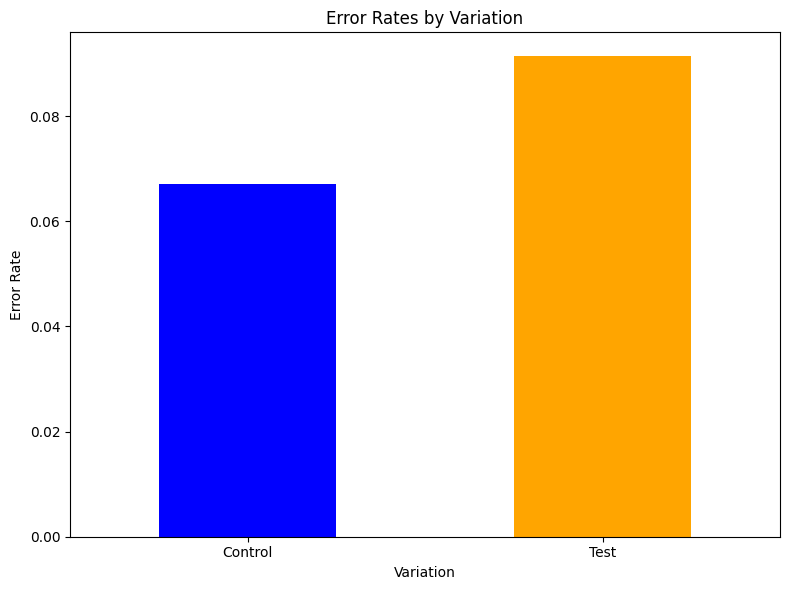

In [84]:
# Plotting the error rates
error_rate_by_variation.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Error Rates by Variation')
plt.xlabel('Variation')
plt.ylabel('Error Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Higher Error Rate in Test Group: 
The test group has a higher error rate (9.14%) compared to the control group (6.70%).

##### Impact of Changes: 
This difference suggests that the changes implemented in the test variation might have introduced complexities or usability issues that led to more users experiencing errors.

##### User Experience Insight: 
The higher error rate in the test group is a signal that the new design, process, or feature being tested could need adjustments to improve user experience and reduce confusion.

#### <a id="step-abandonment-rate-anchor"></a>Step Abandonment Rate

Drop from Previous Step:
          Control      Test
step_1  -0.180442 -0.110771
step_2  -0.079875 -0.089640
step_3  -0.056596 -0.059354
confirm -0.082346 -0.061442


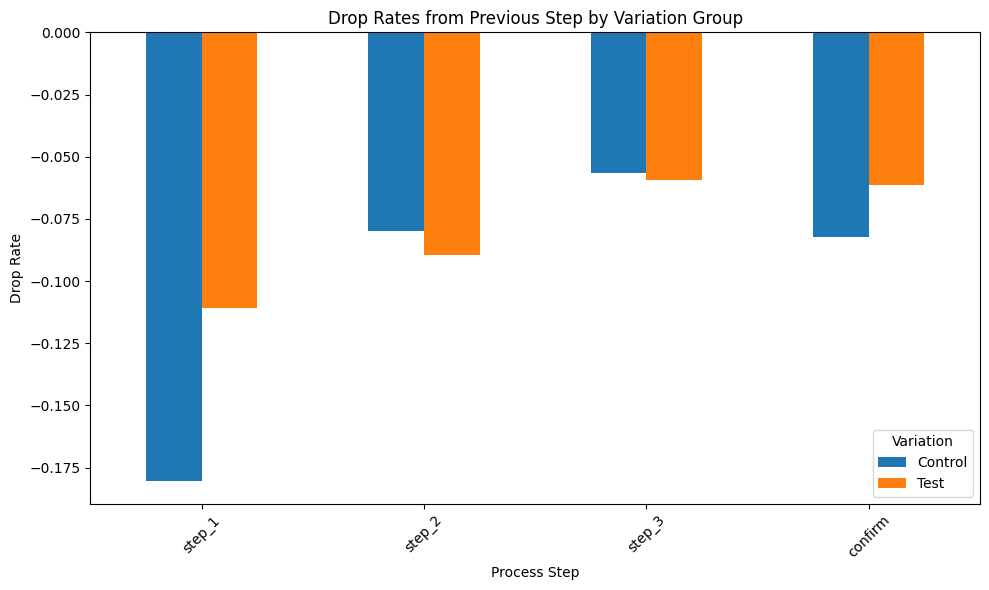

In [85]:
#data
completion_rates_sorted = pd.DataFrame({
    'Control': [1.000, 0.819558, 0.739683, 0.683087, 0.600741],
    'Test': [1.000, 0.889229, 0.799589, 0.740235, 0.678793]
}, index=['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Calculate drop rates for each step
drop_rates = completion_rates_sorted.diff().iloc[1:]  # Calculate the difference and skip the first row (start)

# Print drop rates
print("Drop from Previous Step:")
print(drop_rates)

# Plotting the drop rates for each variation group
drop_rates.plot(kind='bar', figsize=(10, 6))
plt.title('Drop Rates from Previous Step by Variation Group')
plt.xlabel('Process Step')
plt.ylabel('Drop Rate')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.tight_layout()
plt.show()


##### Start to Step 1 (step_1):

* Control Group: The completion rate drops by approximately 18.04% from the "start" step to Step 1. This means that about 18.04% of users who initiated the process in the Control group did not proceed to Step 1.
* Test Group: The completion rate drops by approximately 11.08% from the "start" step to Step 1. This indicates that about 11.08% of users who initiated the process in the Test group did not proceed to Step 1.

Comparison: The Test group shows a lower drop-off rate compared to the Control group, indicating that the changes or features introduced in the Test variation might be more effective in retaining users from the initial step to Step 1.

##### Step 1 to Step 2 (step_2):

* Control Group: The completion rate drops by approximately 7.99% from Step 1 to Step 2. This implies that about 7.99% of users who completed Step 1 in the Control group did not proceed to Step 2.
* Test Group: The completion rate drops by approximately 8.96% from Step 1 to Step 2. This indicates that about 8.96% of users who completed Step 1 in the Test group did not proceed to Step 2.

Comparison: The Control group has a slightly lower drop-off rate compared to the Test group between Step 1 and Step 2, suggesting that there might be a smaller loss of users in the Control group at this transition.

##### Step 2 to Step 3 (step_3):

* Control Group: The completion rate drops by approximately 5.66% from Step 2 to Step 3. This implies that about 5.66% of users who completed Step 2 in the Control group did not proceed to Step 3.
* Test Group: The completion rate drops by approximately 5.94% from Step 2 to Step 3. This indicates that about 5.94% of users who completed Step 2 in the Test group did not proceed to Step 3.

Comparison: The Test group shows a slightly higher drop-off rate compared to the Control group between Step 2 and Step 3, indicating that there might be a marginally larger loss of users in the Test group at this transition.

##### Step 3 to Confirm (confirm):

* Control Group: The completion rate drops by approximately 8.23% from Step 3 to the Confirm step. This implies that about 8.23% of users who completed Step 3 in the Control group did not proceed to the Confirm step.
* Test Group: The completion rate drops by approximately 6.14% from Step 3 to the Confirm step. This suggests that about 6.14% of users who completed Step 3 in the Test group did not proceed to the Confirm step.

Comparison: The Test group shows a slightly lower drop-off rate compared to the Control group between Step 3 and the Confirm step, indicating that there might be a marginally smaller loss of users in the Test group at this transition.

---

## <a id="statistical-tests-anchor"></a>Statistical Tests

In [86]:
df_merged.head()

,client_id,variation,tenure_years,tenure_months,age,gender,number_of_accounts,balance,calls_last_6_months,logons_last_6_months,...,process_step,date_time,date,time,hour,day_of_week,age_group,step_order,previous_step_order,error
94232,555,Test,3,46,29,U,2,25454.66,2,6,...,start,2017-04-15 12:57:56,2017-04-15,12:57:56,12,5,25-34,0,NaN,False
94231,555,Test,3,46,29,U,2,25454.66,2,6,...,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,12,5,25-34,1,0.0,False
94230,555,Test,3,46,29,U,2,25454.66,2,6,...,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,12,5,25-34,2,1.0,False
94229,555,Test,3,46,29,U,2,25454.66,2,6,...,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,13,5,25-34,3,2.0,False
94228,555,Test,3,46,29,U,2,25454.66,2,6,...,confirm,2017-04-15 13:00:34,2017-04-15,13:00:34,13,5,25-34,4,3.0,False


### <a id="hypothesis-testing-anchor"></a>Hypothesis Testing

Significance level: 0.05

##### <a id="hypothesis-i-anchor"></a>Hypothesis I: Test and Control Group Completion Rate Equality Assessment

##### Null Hypothesis (H0): 
The completion rates for the Test and Control groups are equal.

##### Alternative Hypothesis (H1): 
The completion rates for the Test group are higher than those for the Control group.

In [87]:
from statsmodels.stats.proportion import proportions_ztest

In [88]:
# Calculate the number of completions in each group
test_completions = df_merged[(df_merged['variation'] == 'Test') & (df_merged['process_step'] == 'confirm')].shape[0]
control_completions = df_merged[(df_merged['variation'] == 'Control') & (df_merged['process_step'] == 'confirm')].shape[0]

In [89]:
# Calculate the total number of clients in each group
test_total = df_merged[df_merged['variation'] == 'Test'].shape[0]
control_total = df_merged[df_merged['variation'] == 'Control'].shape[0]

In [90]:
successes = np.array([test_completions, control_completions])
trials = np.array([test_total, control_total])

In [91]:
# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(successes, trials, alternative='larger')

In [92]:
print(f"Test Completions: {test_completions}, Test Total: {test_total}")
print(f"Control Completions: {control_completions}, Control Total: {control_total}")
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_value:.4f}")

Test Completions: 25716, Test Total: 177787
Control Completions: 17499, Control Total: 143420
Z-statistic: 18.6875, P-value: 0.0000


In [93]:
# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The completion rate is statistically significantly higher for the Test group.")
else:
    print("Fail to reject the null hypothesis: The completion rate is not statistically significantly higher for the Test group.")

Reject the null hypothesis: The completion rate is statistically significantly higher for the Test group.


The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short-term disruptions or adjustments for users. To justify these costs, the company has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost-effective.

Threshold: The company has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

We have to ensure that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.

##### <a id="hypothesis-ii-anchor"></a>Hypothesis II:  Evaluating Completion Rate Differential Between Test and Control Groups

##### Null Hypothesis (H0): 
The increase in completion rate for the Test group compared to the Control group is less than 5%.

##### Alternative Hypothesis (H1): 
The increase in completion rate for the Test group compared to the Control group is at least 5%.

In [94]:
# Calculate the proportions
test_proportion = test_completions / test_total
control_proportion = control_completions / control_total

In [95]:
# Calculate the observed difference
observed_difference = test_proportion - control_proportion
print('Observed difference:', observed_difference)

Observed difference: 0.022632724891104267


In [96]:
# Set the threshold for minimum increase in completion rate
threshold = 0.05

# Perform the one-sample proportion test
# The null hypothesis is that the increase is less than the threshold
# The alternative hypothesis is that the increase is at least the threshold
# We are performing a one-tailed test
z_stat, p_value = proportions_ztest([test_completions, control_completions], [test_total, control_total], value=threshold, alternative='larger')

In [97]:
# Output the results
print(f"Test Completion Rate: {test_proportion:.4f}")
print(f"Control Completion Rate: {control_proportion:.4f}")
print(f"Observed Difference: {observed_difference:.4f}")
print(f"Threshold for Cost-Effectiveness: {threshold:.4f}")
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_value:.4f}")

Test Completion Rate: 0.1446
Control Completion Rate: 0.1220
Observed Difference: 0.0226
Threshold for Cost-Effectiveness: 0.0500
Z-statistic: -22.5967, P-value: 1.0000


In [98]:
# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The observed increase in completion rate meets or exceeds the 5% threshold.")
else:
    print("Fail to reject the null hypothesis: The observed increase in completion rate does not meet the 5% threshold.")

Fail to reject the null hypothesis: The observed increase in completion rate does not meet the 5% threshold.


#### <a id="hypothesis-iii-anchor"></a>Hypothesis III: Assessing Systematic Differences in Group Distribution

#### Null Hypothesis (H0):
The distribution of clients between the Test (new design) and Control (old design) groups is equal, indicating that there is no systematic difference in the allocation of clients to the two groups.

#### Alternative Hypothesis (H1):
The distribution of clients between the Test (new design) and Control (old design) groups is not equal, suggesting that there is a systematic difference in the allocation of clients, possibly indicating non-random assignment or unequal group sizes.

In [99]:
# Count the number of clients in each group
group_counts = df_merged['variation'].value_counts()

# Calculate the proportion of clients in each group
total_clients = len(df_merged)
test_proportion = group_counts['Test'] / total_clients
control_proportion = group_counts['Control'] / total_clients

# Print the results
print("Group Distribution:")
print(f"Test Group Proportion: {test_proportion:.2f}")
print(f"Control Group Proportion: {control_proportion:.2f}")

Group Distribution:
Test Group Proportion: 0.55
Control Group Proportion: 0.45


In [100]:
#Perform a chi-square test for group equality
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_merged['variation'], columns=['count'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-square test results
print("\nChi-square Test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

# Interpret the chi-square test results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in group sizes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in group sizes.")


Chi-square Test:
Chi-square statistic: 0.00
P-value: 1.0000
Fail to reject the null hypothesis: There is no significant difference in group sizes.


In [101]:
# Converting cleaned df to csv to create Tableau visualizations

df_merged.to_csv('data.csv', index=False)

---

## <a id="ab-testing-conclusions-anchor"></a>A/B Testing Conclusions

#### Completion Rates:

* Test Group: 69.29%
* Control Group: 65.58%
* Percentage Increase: 3.71%

The test group demonstrates a higher completion rate compared to the control group, indicating the new design is more effective in guiding users through the process. The percentage increase in completion rate from the control group to the test group is 3.71%.

#### Gender Comparison:

Across all gender groups (Females, Males, and Unknown/Unspecified), completion rates are higher in the test group compared to the control group, suggesting that the test variation is generally more effective. Males show the largest increase in completion rate when exposed to the test variation, with a noticeable increase from 66.46% in the control group to 70.74% in the test group.

#### Age Group Comparison:

Completion rates in the test group are slightly higher across all age groups compared to the control group. The difference in completion rates between the test and control groups is more pronounced in the older age groups, suggesting the test variation might have a more significant impact on completion rates for older users.

#### Average Time Spent:

The test group consistently demonstrates shorter average durations across all steps compared to the control group, indicating improved efficiency or user experience. Users in the test group progress more swiftly through each step of the process, suggesting a positive impact of the changes introduced in the test variation on user behavior and process efficiency.

#### Error Rate:

The test group has a higher error rate (9.14%) compared to the control group (6.70%), indicating the changes implemented in the test variation might have introduced complexities or usability issues.

#### Step Abandonment Rate:

Across all steps, the test group consistently shows higher completion rates compared to the control group, indicating the changes or features introduced in the test variation are beneficial in reducing drop-offs at each step.

#### Overall Summary:

The test variation demonstrates higher completion rates, shorter average time spent, and higher step completion rates compared to the control group, suggesting the test design is more effective in guiding users through the process and reducing drop-offs. However, the higher error rate in the test group indicates a need for adjustments to improve user experience and reduce confusion.

In conclusion, the test variation shows promising improvements in completion rates and user engagement compared to the control group, although further optimization may be required to address the higher error rate observed in the test group.

#### Hypothesis Testing:

#### Hypothesis 1: Testing Completion Rates
* Null Hypothesis (H0): The completion rates for the Test and Control groups are equal.
* Alternative Hypothesis (H1): The completion rates for the Test group are higher than those for the Control group.

Given the observed data, we reject the null hypothesis. The completion rate is statistically significantly higher for the Test group.

#### Hypothesis 2: Cost-Effectiveness Threshold

The company requires a minimum 5% increase in the completion rate for the new design to be considered cost-effective.

* Null Hypothesis (H0): The increase in completion rate for the Test group compared to the Control group is less than 5%.
* Alternative Hypothesis (H1): The increase in completion rate for the Test group compared to the Control group is at least 5%.

The observed increase in completion rate from the control group (65.58%) to the test group (69.29%) is 3.71%, which does not meet the company's threshold of 5%. Therefore, we fail to reject the null hypothesis that the increase is less than 5% and accept that the increase does not meet the 5% threshold.

#### Final Conclusion:

The new design demonstrates a statistically significant higher completion rate, but it does not meet the required 5% increase threshold set by the organization. Despite the improvements in completion rates and user engagement, the new design may not be justifiable from a cost perspective, given that it does not meet the minimum increase threshold for cost-effectiveness. Further optimization and evaluation are necessary to ensure that the new design can achieve at least a 5% increase in completion rate to justify the associated costs.

---

### <a id="short-experiment-evaluation-anchor"></a>Experiment Evaluation

#### Well-Structured Experiment:

The experiment was meticulously structured with clear objectives and defined metrics to measure success. Key performance indicators (KPIs), such as completion rates, were carefully selected to gauge the effectiveness of the new design. By establishing these metrics upfront, the experiment aimed to provide actionable insights into the impact of design changes on user behavior.

The adoption of an A/B test setup enabled a direct comparison between the old and new designs, which is a recognized method for evaluating design changes. This approach allowed for the isolation of the treatment effect while controlling for confounding variables. Random assignment of clients to either the test or control group ensured a controlled environment for assessing the effectiveness of the new design.
    
#### Randomization and Equality:

One of the critical aspects of experimental design is randomization, which helps mitigate potential biases and ensures the validity of the results. The hypothesis testing conducted during the experiment failed to reject the null hypothesis, indicating no significant difference in group sizes between the test and control groups. This suggests that clients were randomly and equally divided between the old and new designs, thereby minimizing the risk of selection bias and ensuring an unbiased comparison.
    
    
#### Duration Assessment:

The experiment spanned from March 15, 2017, to June 20, 2017, covering a period of three months. While this timeframe allowed for the collection of meaningful data and insights, a longer duration may have provided additional opportunities to observe trends and patterns in client behavior.

Extending the duration of the experiment could enable the detection of any temporal effects or seasonality that might influence user behavior. By capturing data over an extended period, the experiment could offer a more robust assessment of the long-term impact of the design changes on client interactions and engagement metrics.

In summary, while the experiment was well-structured with clear objectives and a robust experimental design, extending the duration of the testing period could potentially provide deeper insights into the effects of the design changes over time.